# 🏥 Comprehensive Exploratory Data Analysis
## Biomechanical Features of Orthopedic Patients

### 📋 Executive Summary
This notebook provides a comprehensive exploratory data analysis of biomechanical features in orthopedic patients. The analysis includes statistical tests, advanced visualizations, dimensionality reduction, and clustering techniques to understand the relationship between biomechanical measurements and orthopedic conditions.

### 🎯 Key Objectives
1. **Dataset Overview**: Understand data structure, missing values, and basic statistics
2. **Target Analysis**: Examine class distribution and balance
3. **Feature Analysis**: Analyze numerical features, distributions, and outliers
4. **Correlation Analysis**: Identify multicollinearity and feature relationships
5. **Statistical Testing**: Perform hypothesis testing for group differences
6. **Dimensionality Reduction**: Apply PCA and t-SNE for visualization
7. **Clustering**: Discover natural groupings in the data

### 📊 Dataset Information
- **Source**: UCI Machine Learning Repository
- **Features**: 6 biomechanical attributes
- **Target**: 3-class (Normal, Hernia, Spondylolisthesis) and binary classification
- **Size**: 310 patient records

### Comprehensive Exploratory Data Analysis
##### Biomechanical Features of Orthopedic Patients
This notebook provides a comprehensive exploratory data analysis of biomechanical features in orthopedic patients, including statistical tests, visualizations, and dimensionality reduction techniques.

In [80]:
# Cell 1: Imports and setup

import os

# Create plots folder if it does not exist
plots_folder = "plots"
os.makedirs(plots_folder, exist_ok=True)

# Import all necessary libraries for comprehensive data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, normaltest, levene
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings("ignore")
import kagglehub

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# COMPREHENSIVE EXPLORATORY DATA ANALYSIS  
### Biomechanical Features of Orthopedic Patients


In [81]:
# Cell 2: Download and load dataset

# Download dataset from Kaggle and load it
path = kagglehub.dataset_download("uciml/biomechanical-features-of-orthopedic-patients")
print("Path to dataset files:", path)

# Load the dataset
os.listdir(path)
df = pd.read_csv(os.path.join(path, 'column_3C_weka.csv'))

# Add binary_class column
df['binary_class'] = df['class'].replace({
    'Hernia': 'Abnormal',
    'Spondylolisthesis': 'Abnormal',
    'Normal': 'Normal'
})


Path to dataset files: /Users/cholponzhakshylykova/.cache/kagglehub/datasets/uciml/biomechanical-features-of-orthopedic-patients/versions/1


# Dataset overview

In [82]:


def dataset_overview(df):
    """
    Provide comprehensive overview of the dataset including:
    - Dataset dimensions and memory usage
    - Column information (data types, missing values, unique values)
    - Missing data analysis
    """
    print("\n" + "="*50)
    print("1. DATASET OVERVIEW")
    print("="*50)
    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\nColumn Information:")
    print("-" * 40)
    for col in df.columns:
        dtype = df[col].dtype
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        unique_vals = df[col].nunique()
        print(f"{col:25} | {str(dtype):10} | Nulls: {null_count:3} ({null_pct:5.1f}%) | Unique: {unique_vals:4}")
    print(f"\nData Types Summary:")
    print(df.dtypes.value_counts())
    if df.isnull().sum().sum() > 0:
        print("\nMissing Values Details:")
        missing_data = pd.DataFrame({
            'Column': df.columns,
            'Missing_Count': df.isnull().sum(),
            'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
        })
        print(missing_data[missing_data['Missing_Count'] > 0])
    else:
        print("\n✓ No missing values found in the dataset")

dataset_overview(df)



1. DATASET OVERVIEW
Dataset Shape: (310, 8)
Memory Usage: 0.05 MB

Column Information:
----------------------------------------
pelvic_incidence          | float64    | Nulls:   0 (  0.0%) | Unique:  310
pelvic_tilt               | float64    | Nulls:   0 (  0.0%) | Unique:  310
lumbar_lordosis_angle     | float64    | Nulls:   0 (  0.0%) | Unique:  280
sacral_slope              | float64    | Nulls:   0 (  0.0%) | Unique:  281
pelvic_radius             | float64    | Nulls:   0 (  0.0%) | Unique:  310
degree_spondylolisthesis  | float64    | Nulls:   0 (  0.0%) | Unique:  310
class                     | object     | Nulls:   0 (  0.0%) | Unique:    3
binary_class              | object     | Nulls:   0 (  0.0%) | Unique:    2

Data Types Summary:
float64    6
object     2
Name: count, dtype: int64

✓ No missing values found in the dataset


# Target variable analysis


===== EDA for class =====

2. TARGET VARIABLE ANALYSIS
Class Distribution:
--------------------
Spondylolisthesis:  150 ( 48.4%)
Normal         :  100 ( 32.3%)
Hernia         :   60 ( 19.4%)

Class Imbalance Analysis:
Imbalance Ratio: 2.50
⚠️  Dataset shows class imbalance - consider balancing techniques


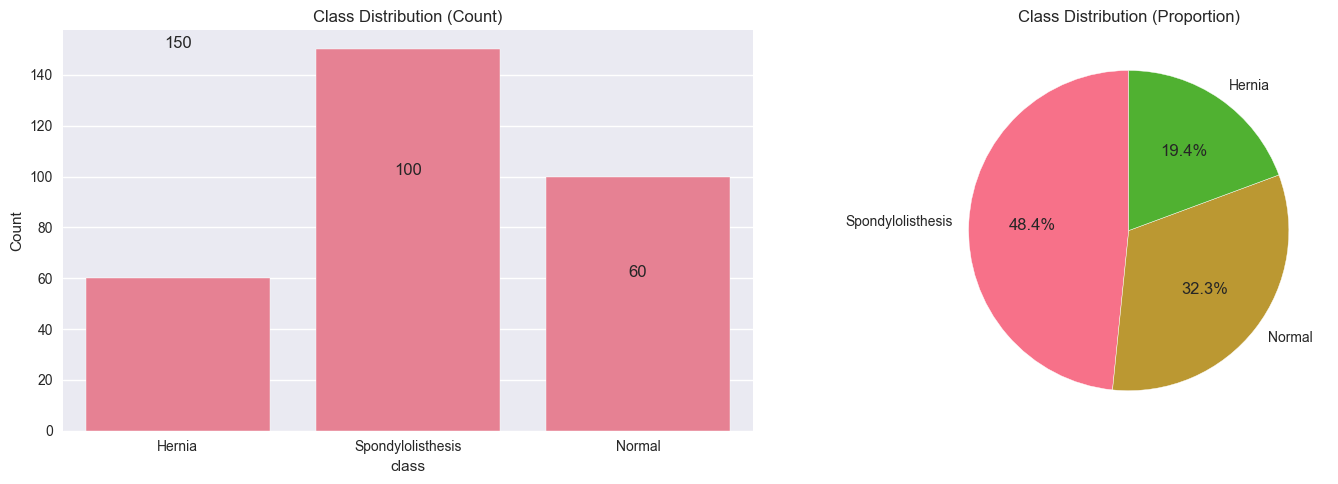


===== EDA for binary_class =====

2. TARGET VARIABLE ANALYSIS
Class Distribution:
--------------------
Abnormal       :  210 ( 67.7%)
Normal         :  100 ( 32.3%)

Class Imbalance Analysis:
Imbalance Ratio: 2.10
⚠️  Dataset shows class imbalance - consider balancing techniques


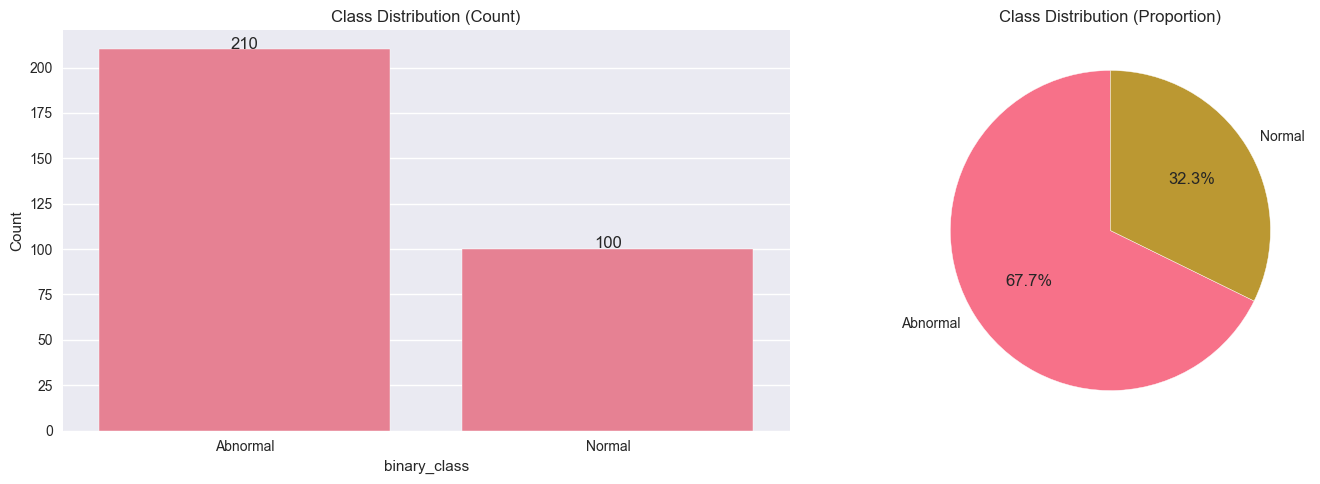

In [83]:
# Cell 4: Target variable analysis

def target_analysis(df, target_col='class'):
    """
    Analyze the target variable including:
    - Class distribution (counts and percentages)
    - Class imbalance assessment
    - Visualization of class distribution
    """
    print("\n" + "="*50)
    print("2. TARGET VARIABLE ANALYSIS")
    print("="*50)
    class_counts = df[target_col].value_counts()
    class_props = df[target_col].value_counts(normalize=True)
    print("Class Distribution:")
    print("-" * 20)
    for class_name, count in class_counts.items():
        percentage = class_props[class_name] * 100
        print(f"{class_name:15}: {count:4} ({percentage:5.1f}%)")
    max_class = class_counts.max()
    min_class = class_counts.min()
    imbalance_ratio = max_class / min_class
    print(f"\nClass Imbalance Analysis:")
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
    if imbalance_ratio > 1.5:
        print("⚠️  Dataset shows class imbalance - consider balancing techniques")
    else:
        print("✓ Dataset is relatively balanced")
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.countplot(data=df, x=target_col, ax=axes[0])
    axes[0].set_title('Class Distribution (Count)')
    axes[0].set_ylabel('Count')
    for i, v in enumerate(class_counts.values):
        axes[0].text(i, v + 0.5, str(v), ha='center')
    axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Class Distribution (Proportion)')
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/target_class_distribution_{target_col}.png", bbox_inches="tight")
    plt.show()

for tgt in ['class', 'binary_class']:
    print(f"\n===== EDA for {tgt} =====")
    target_analysis(df, target_col=tgt)

# Numerical features analysis


===== EDA for class =====

3. NUMERICAL FEATURES ANALYSIS
Descriptive Statistics:
-------------------------
       pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count           310.000      310.000                310.000       310.000   
mean             60.497       17.543                 51.931        42.954   
std              17.237       10.008                 18.554        13.423   
min              26.148       -6.555                 14.000        13.367   
25%              46.430       10.667                 37.000        33.347   
50%              58.691       16.358                 49.562        42.405   
75%              72.878       22.120                 63.000        52.696   
max             129.834       49.432                125.742       121.430   

       pelvic_radius  degree_spondylolisthesis  
count        310.000                   310.000  
mean         117.921                    26.297  
std           13.317                    37.559  
m

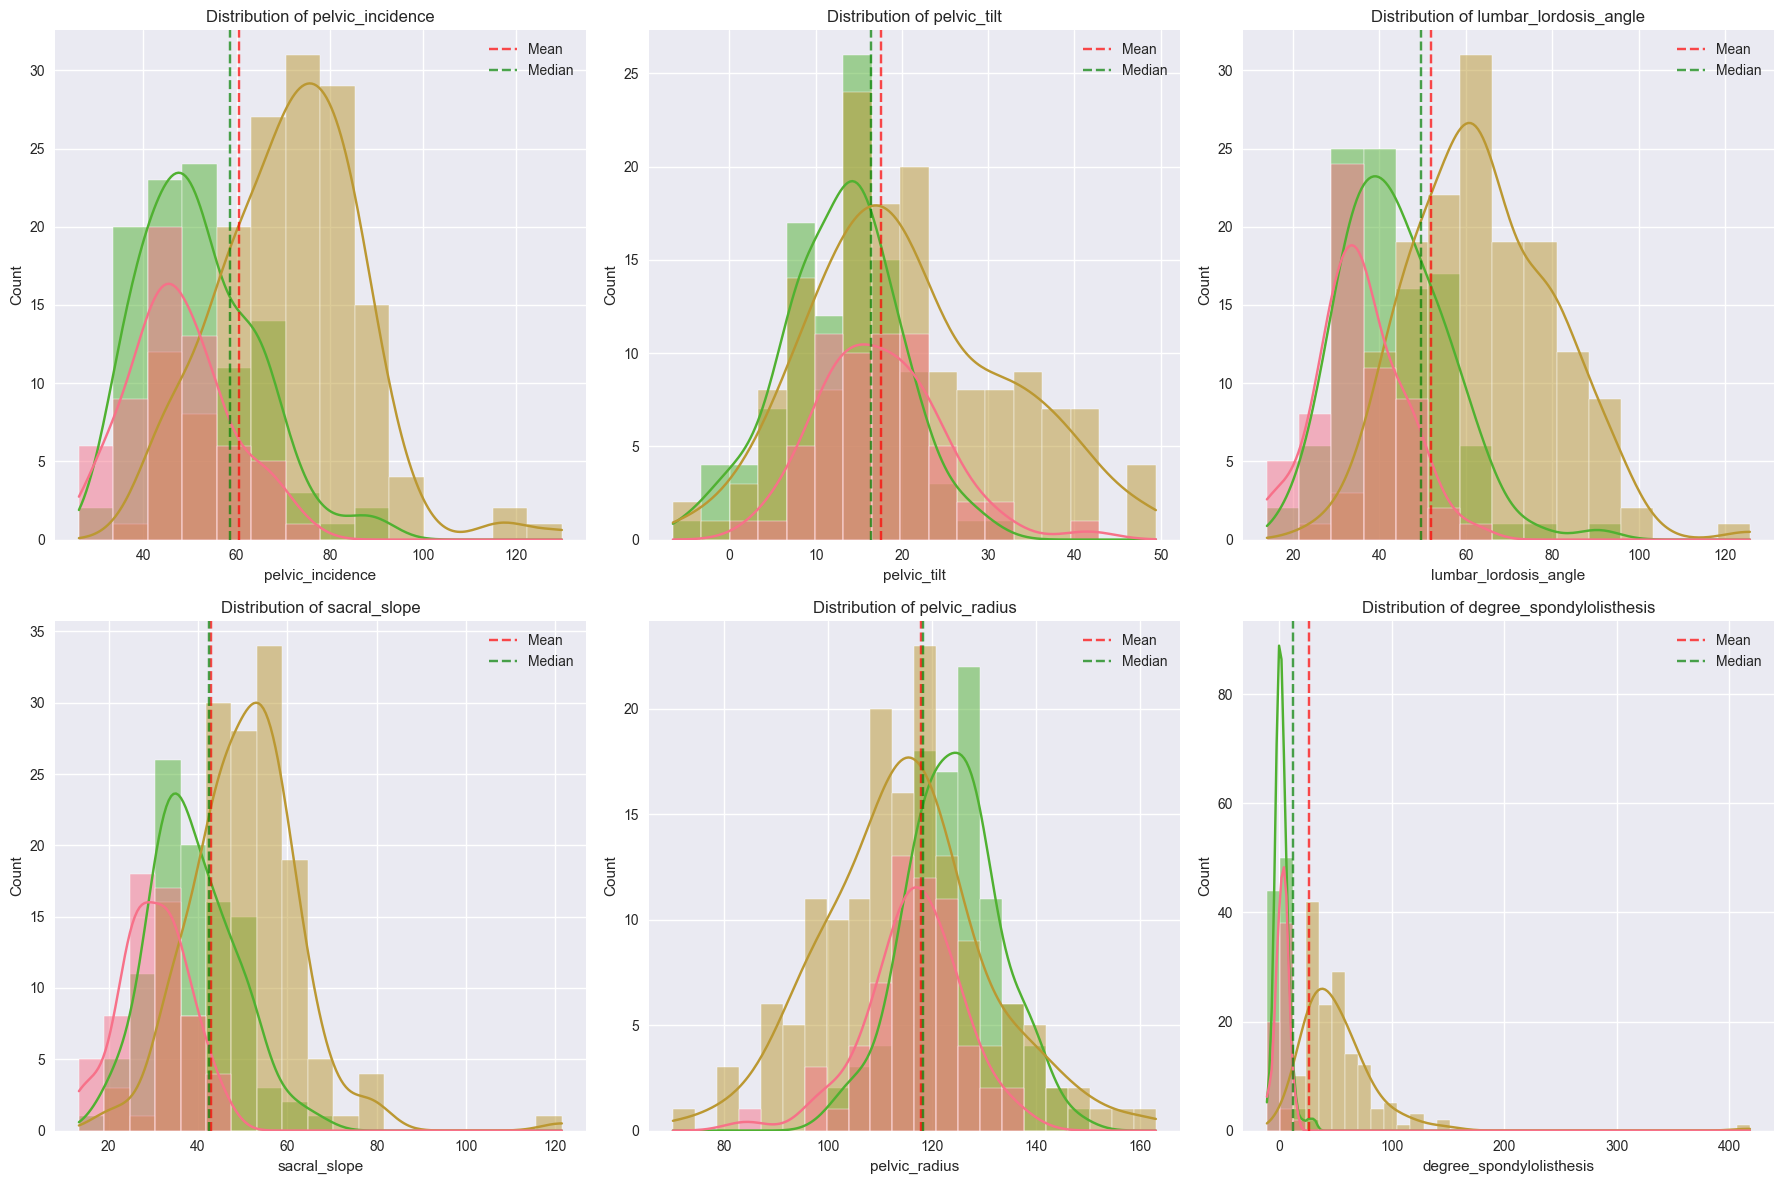

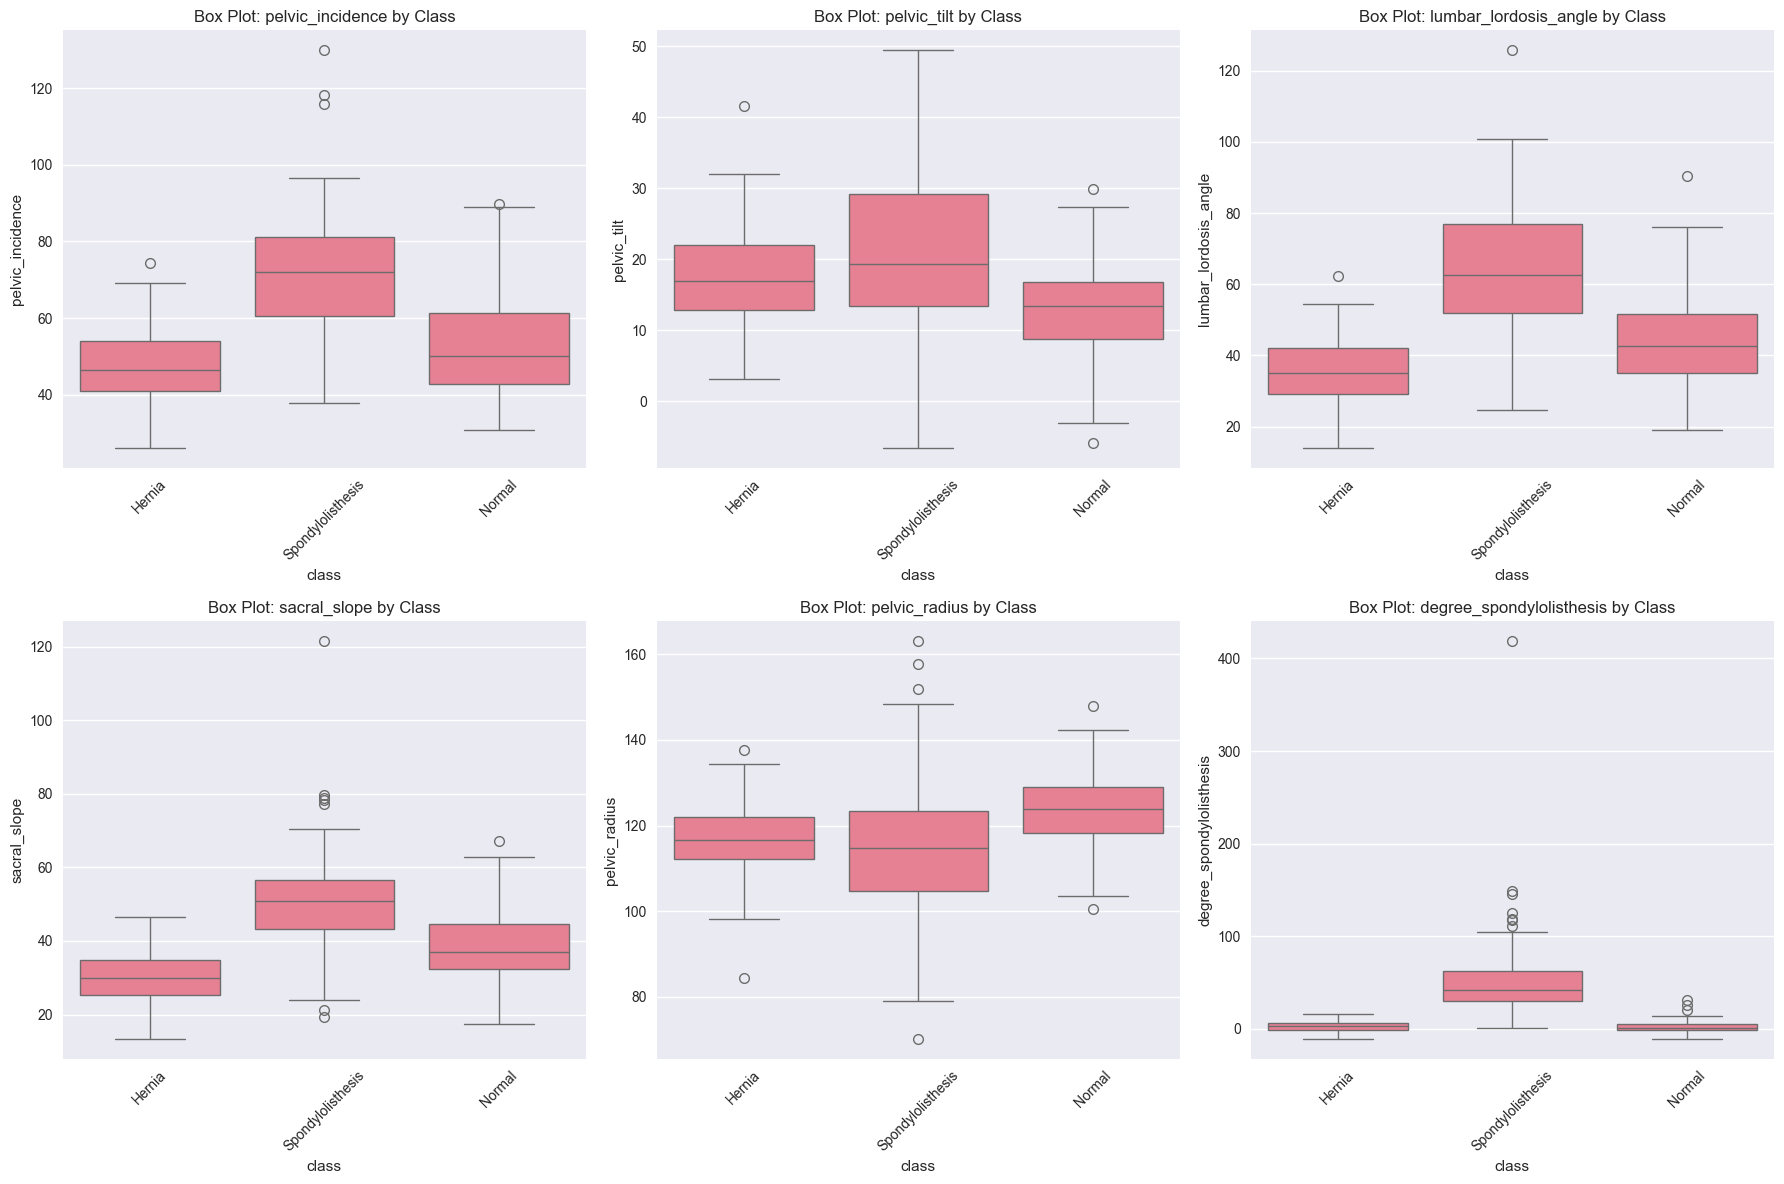


===== EDA for binary_class =====

3. NUMERICAL FEATURES ANALYSIS
Descriptive Statistics:
-------------------------
       pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count           310.000      310.000                310.000       310.000   
mean             60.497       17.543                 51.931        42.954   
std              17.237       10.008                 18.554        13.423   
min              26.148       -6.555                 14.000        13.367   
25%              46.430       10.667                 37.000        33.347   
50%              58.691       16.358                 49.562        42.405   
75%              72.878       22.120                 63.000        52.696   
max             129.834       49.432                125.742       121.430   

       pelvic_radius  degree_spondylolisthesis  
count        310.000                   310.000  
mean         117.921                    26.297  
std           13.317                    37.

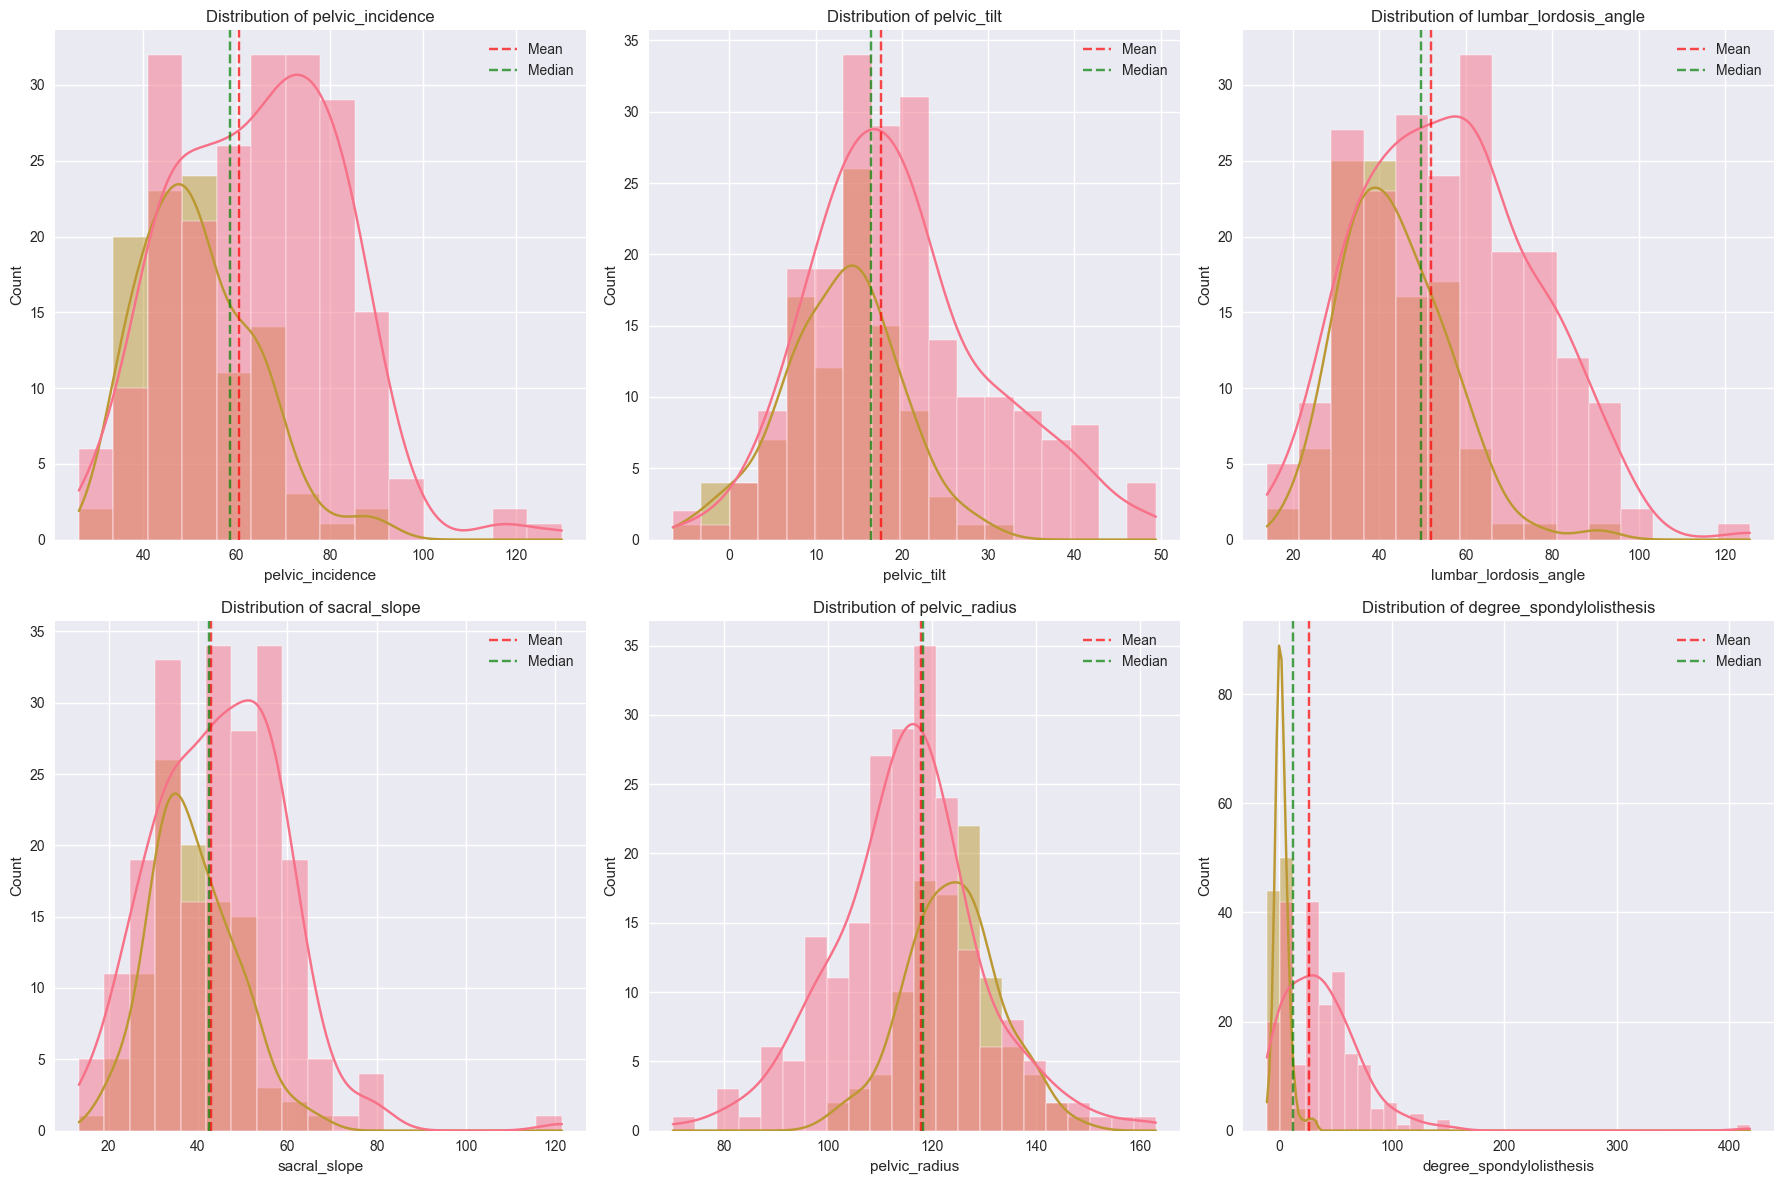

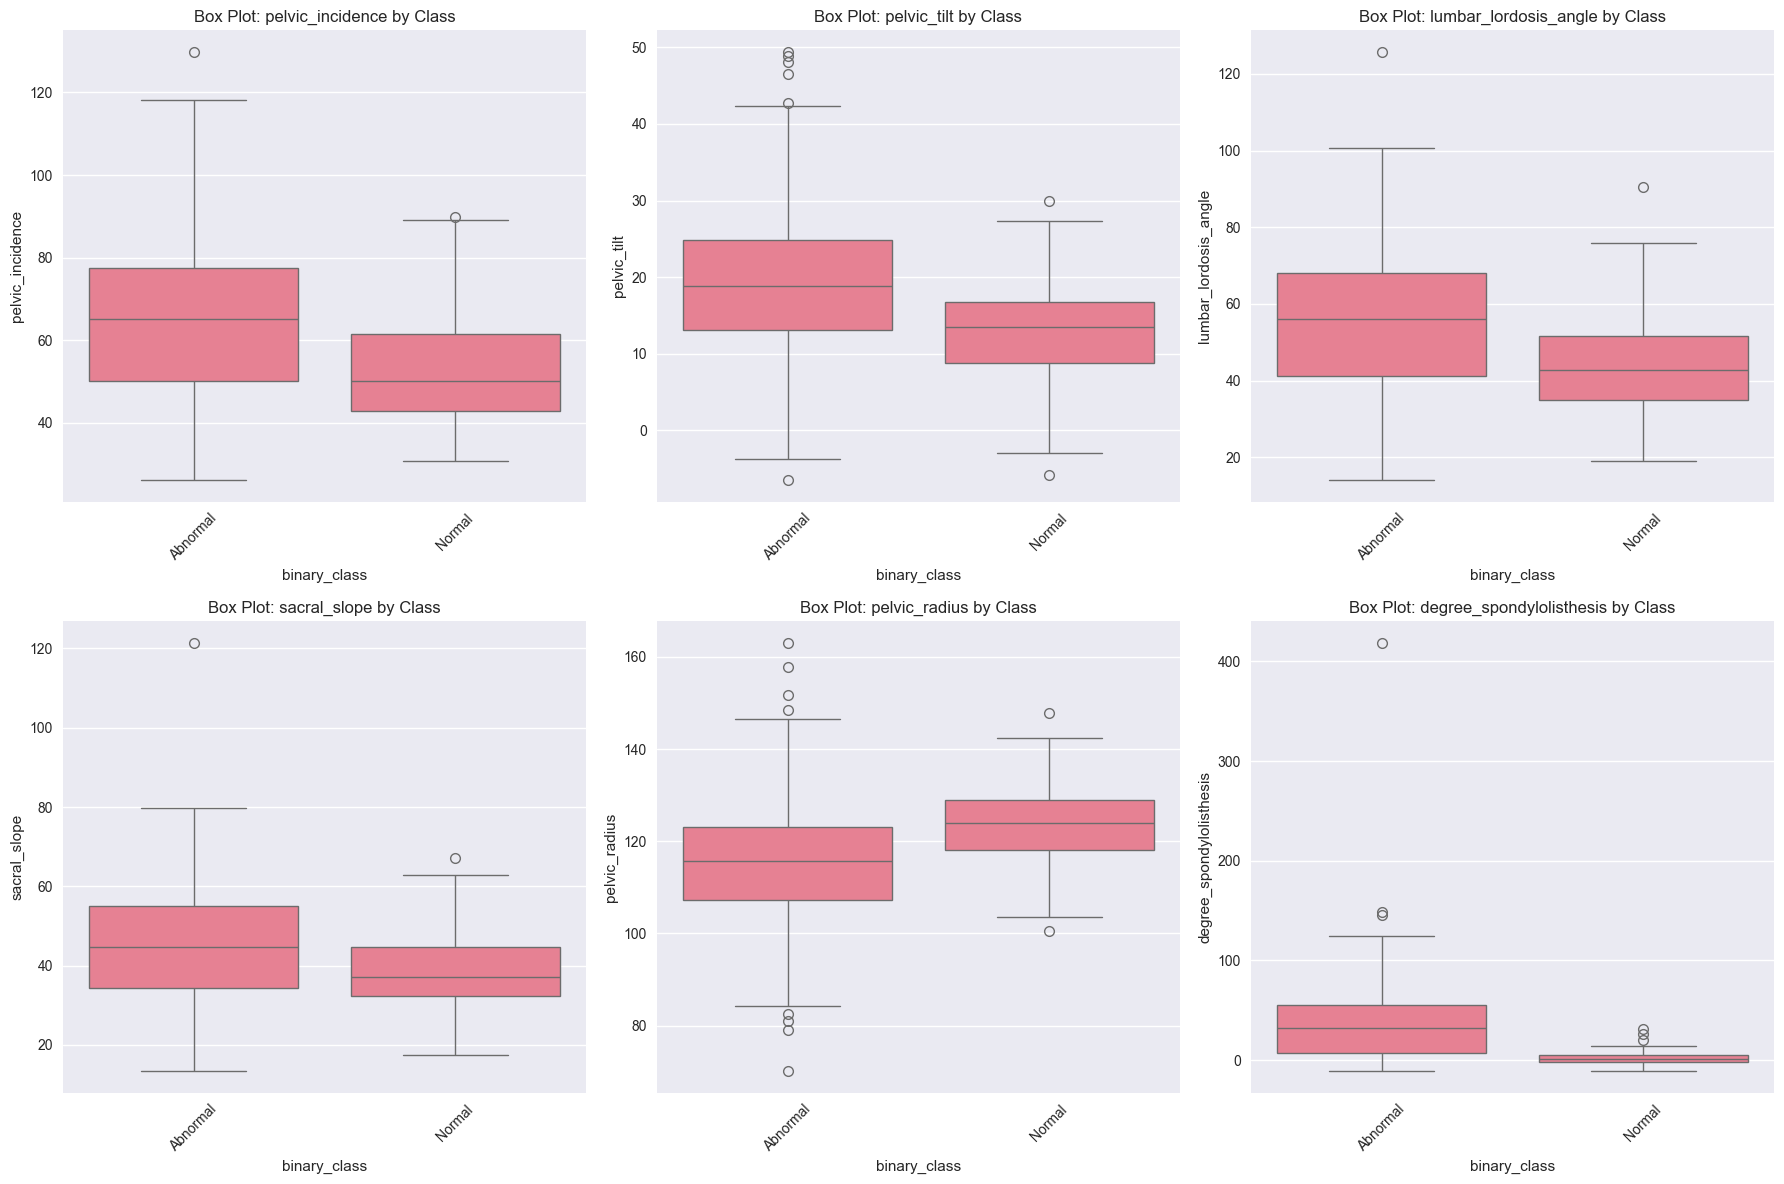

In [84]:
# Cell 5: Numerical features analysis

def numerical_features_analysis(df, target_col='class'):
    """
    Comprehensive analysis of numerical features including:
    - Descriptive statistics
    - Distribution analysis (skewness, kurtosis)
    - Normality tests
    - Histograms and box plots by class
    """
    print("\n" + "="*50)
    print("3. NUMERICAL FEATURES ANALYSIS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print("Descriptive Statistics:")
    print("-" * 25)
    desc_stats = df[numerical_cols].describe()
    print(desc_stats.round(3))
    print("\nDistribution Analysis:")
    print("-" * 25)
    distribution_stats = pd.DataFrame({
        'Feature': numerical_cols,
        'Skewness': df[numerical_cols].skew(),
        'Kurtosis': df[numerical_cols].kurtosis(),
        'Range': df[numerical_cols].max() - df[numerical_cols].min(),
        'IQR': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
    })
    print(distribution_stats.round(3))
    print("\nNormality Tests (Shapiro-Wilk p-values):")
    print("-" * 35)
    for col in numerical_cols:
        if len(df[col].dropna()) <= 5000:
            _, p_value = stats.shapiro(df[col].dropna())
            status = "Normal" if p_value > 0.05 else "Non-normal"
            print(f"{col:25}: p={p_value:.6f} ({status})")
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, hue=target_col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.7, label='Median')
        axes[i].legend()
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/numerical_features_distribution_{target_col}.png", bbox_inches="tight")
    plt.show()
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=target_col, y=col, ax=axes[i])
        axes[i].set_title(f'Box Plot: {col} by Class')
        axes[i].tick_params(axis='x', rotation=45)
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/numerical_features_boxplots_{target_col}.png", bbox_inches="tight")
    plt.show()


for tgt in ['class', 'binary_class']:
    print(f"\n===== EDA for {tgt} =====")
    numerical_features_analysis(df, target_col=tgt)

The degree_spondylolisthesis feature exhibited high positive skewness. Applying a log1p transformation significantly reduced this skew, making the distribution more symmetric and centered around the median. This not only improves numerical stability for downstream models but also enhances the effectiveness of standard scaling.

# Outlier Analysis


4. OUTLIER DETECTION AND ANALYSIS
Outlier Detection Summary:
------------------------------
                    Feature  IQR_Outliers  Z_Score_Outliers  \
0          pelvic_incidence             3                 3   
1               pelvic_tilt            13                 3   
2     lumbar_lordosis_angle             1                 1   
3              sacral_slope             1                 1   
4             pelvic_radius            11                 3   
5  degree_spondylolisthesis            10                 3   

   Modified_Z_Outliers  IQR_Percentage  Lower_Bound  Upper_Bound  
0                    1           0.968        6.759      112.549  
1                    4           4.194       -6.513       39.300  
2                    1           0.323       -2.000      102.000  
3                    1           0.323        4.324       81.719  
4                    4           3.548       88.571      147.605  
5                   14           3.226      -57.922      100.81

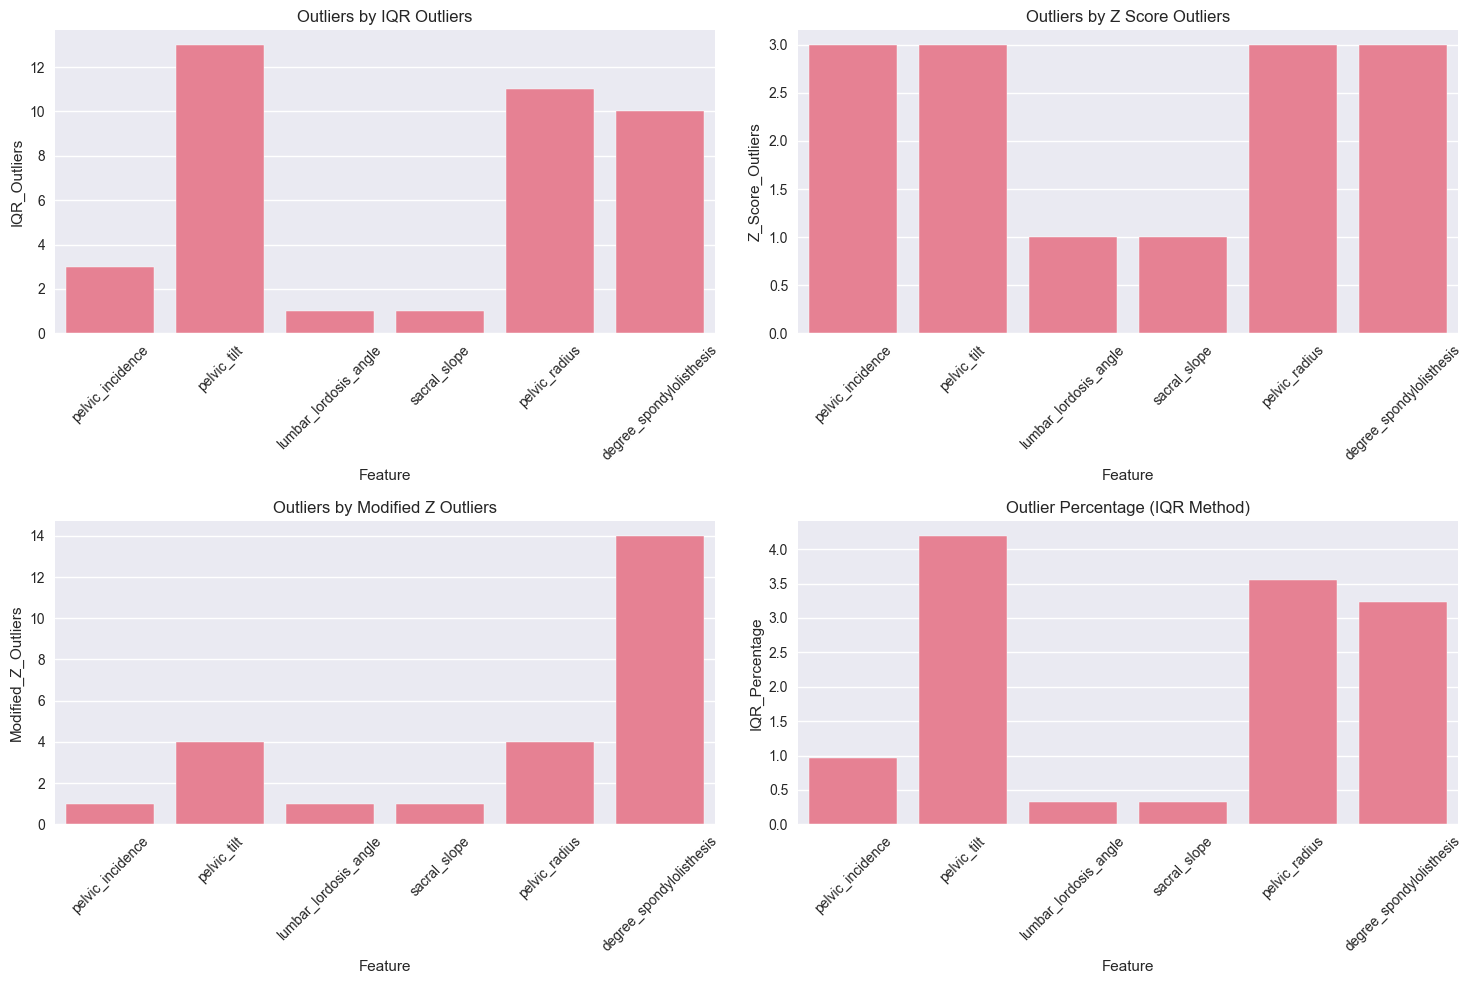

In [85]:


def outlier_analysis(df):
    """
    Comprehensive outlier detection using multiple methods:
    - IQR method (Interquartile Range)
    - Z-score method
    - Modified Z-score method
    - Visualization of outlier patterns
    """
    print("\n" + "="*50)
    print("4. OUTLIER DETECTION AND ANALYSIS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    outlier_summary = []
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        z_scores = np.abs(stats.zscore(df[col]))
        z_outliers = (z_scores > 3).sum()
        median = df[col].median()
        mad = np.median(np.abs(df[col] - median))
        modified_z_scores = 0.6745 * (df[col] - median) / mad
        modified_z_outliers = (np.abs(modified_z_scores) > 3.5).sum()
        outlier_summary.append({
            'Feature': col,
            'IQR_Outliers': iqr_outliers,
            'Z_Score_Outliers': z_outliers,
            'Modified_Z_Outliers': modified_z_outliers,
            'IQR_Percentage': (iqr_outliers / len(df)) * 100,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
    outlier_df = pd.DataFrame(outlier_summary)
    print("Outlier Detection Summary:")
    print("-" * 30)
    print(outlier_df.round(3))
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    methods = ['IQR_Outliers', 'Z_Score_Outliers', 'Modified_Z_Outliers']
    for i, method in enumerate(methods):
        if i < 3:
            ax = axes[i//2, i%2]
            sns.barplot(data=outlier_df, x='Feature', y=method, ax=ax)
            ax.set_title(f'Outliers by {method.replace("_", " ")}')
            ax.tick_params(axis='x', rotation=45)
    sns.barplot(data=outlier_df, x='Feature', y='IQR_Percentage', ax=axes[1, 1])
    axes[1, 1].set_title('Outlier Percentage (IQR Method)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/outlier_detection_summary.png", bbox_inches="tight")
    plt.show()

outlier_analysis(df)

# Correlation and multicollinearity analysis


5. CORRELATION AND MULTICOLLINEARITY ANALYSIS
Correlation Matrix:
--------------------
                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                     1.000        0.629   
pelvic_tilt                          0.629        1.000   
lumbar_lordosis_angle                0.717        0.433   
sacral_slope                         0.815        0.062   
pelvic_radius                       -0.247        0.033   
degree_spondylolisthesis             0.639        0.398   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                          0.717         0.815         -0.247   
pelvic_tilt                               0.433         0.062          0.033   
lumbar_lordosis_angle                     1.000         0.598         -0.080   
sacral_slope                              0.598         1.000         -0.342   
pelvic_radius                            -0.080        -0.342          1.000   
degree_spondylolis

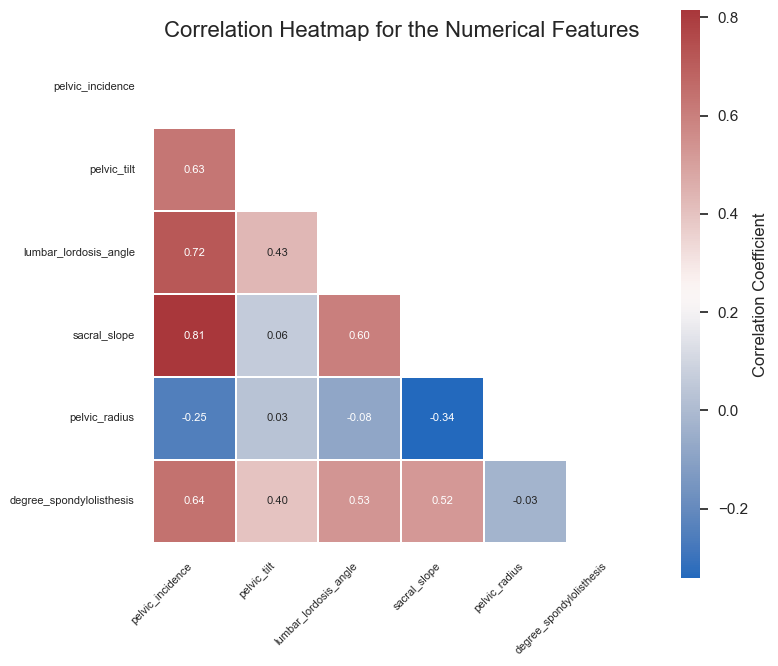

In [86]:

def correlation_analysis(df):
    """
    Analyze correlations and multicollinearity:
    - Correlation matrix calculation
    - Identification of highly correlated pairs
    - Variance Inflation Factor (VIF) analysis
    - Correlation visualizations
    """
    print("\n" + "="*50)
    print("5. CORRELATION AND MULTICOLLINEARITY ANALYSIS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    corr_matrix = df[numerical_cols].corr()
    print("Correlation Matrix:")
    print("-" * 20)
    print(corr_matrix.round(3))
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    if high_corr_pairs:
        print("\nHighly Correlated Pairs (|r| > 0.7):")
        print("-" * 35)
        for pair in high_corr_pairs:
            print(f"{pair[0]} <-> {pair[1]}: r = {pair[2]:.3f}")
    else:
        print("\nNo highly correlated pairs found (|r| > 0.7)")
    print("\nVariance Inflation Factor (VIF) Analysis:")
    print("-" * 40)
    X_numeric = df[numerical_cols].dropna()
    vif_data = pd.DataFrame({
        "Feature": numerical_cols,
        "VIF": [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
    })
    print(vif_data.round(3))
    high_vif = vif_data[vif_data['VIF'] > 10]
    if not high_vif.empty:
        print("\n⚠️  Features with high VIF (>10) indicating multicollinearity:")
        print(high_vif)
    else:
        print("\n✓ No severe multicollinearity detected (all VIF < 10)")


correlation_analysis(df)


# make a nice correlation heatmap
def plot_correlation_heatmap(df):
    """
    Plot a correlation heatmap for numerical features, masking the upper triangle to avoid redundancy.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    corr_matrix = df[numerical_cols].corr()

    #create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.set(style='white')

    plt.figure(figsize=(8, 8)) # set high DPI for better quality
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='vlag', square=True, cbar_kws={
            "shrink": 0.8,
            "aspect": 30,
            "label": "Correlation Coefficient"
        }, annot_kws={"size": 8}, mask=mask, linewidths=.1, linecolor='white')
        # Styling adjustments
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.title('Correlation Heatmap for the Numerical Features', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/correlation_heatmap.png", bbox_inches="tight")
    plt.show()
plot_correlation_heatmap(df)


===== EDA for class =====

6. FEATURE RELATIONSHIPS AND INTERACTIONS
Generating pair plot for feature relationships...


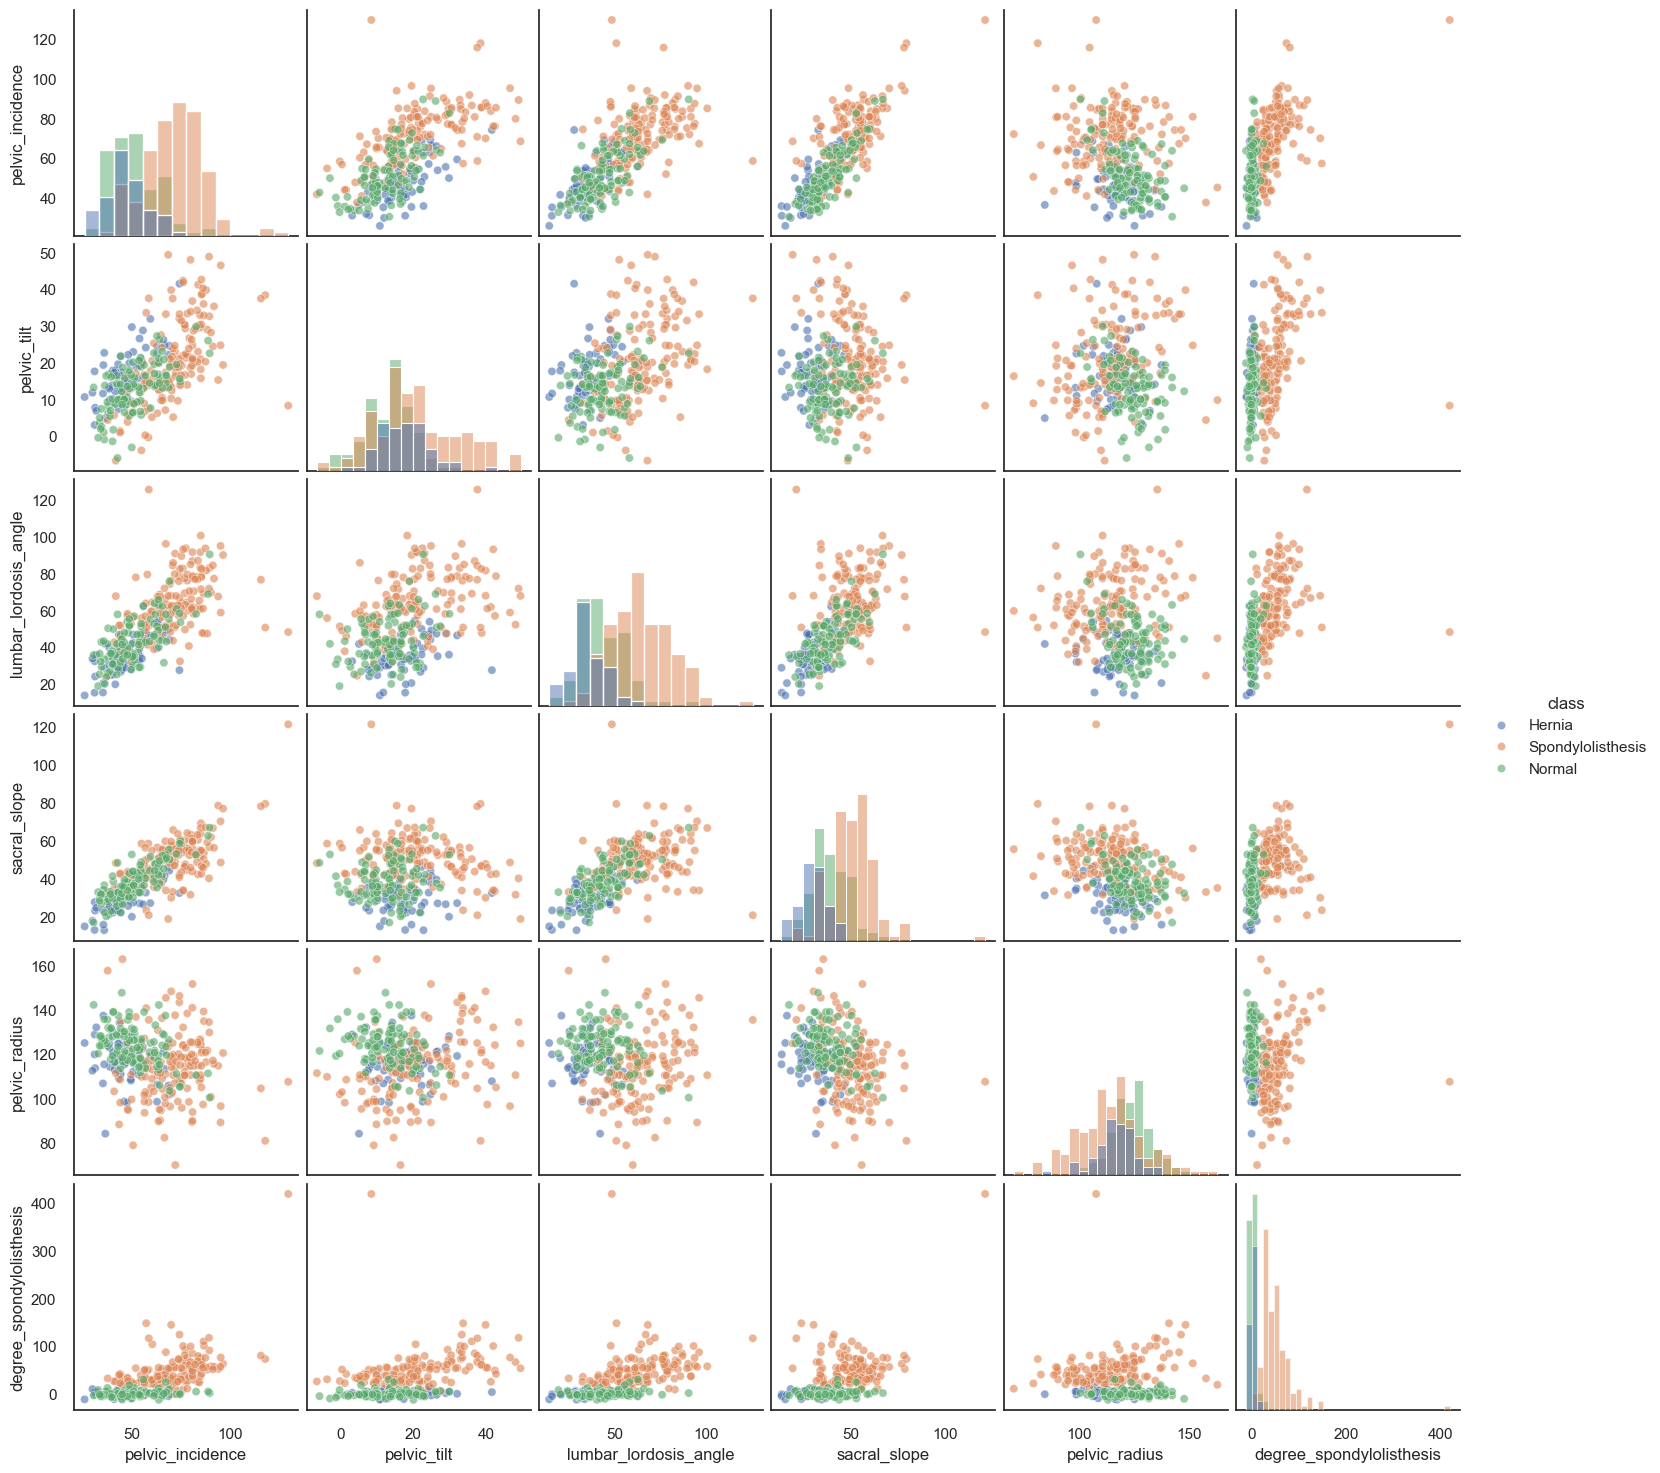


Feature Interactions Analysis:
-----------------------------------
                    Feature  F_Statistic  P_Value  Effect_Size  Significant
0          pelvic_incidence    98.539709      0.0     0.242984         True
1               pelvic_tilt    21.299194      0.0     0.064877         True
2     lumbar_lordosis_angle   114.982840      0.0     0.272482         True
3              sacral_slope    89.643953      0.0     0.226006         True
4             pelvic_radius    16.866935      0.0     0.052080         True
5  degree_spondylolisthesis   119.122881      0.0     0.279551         True


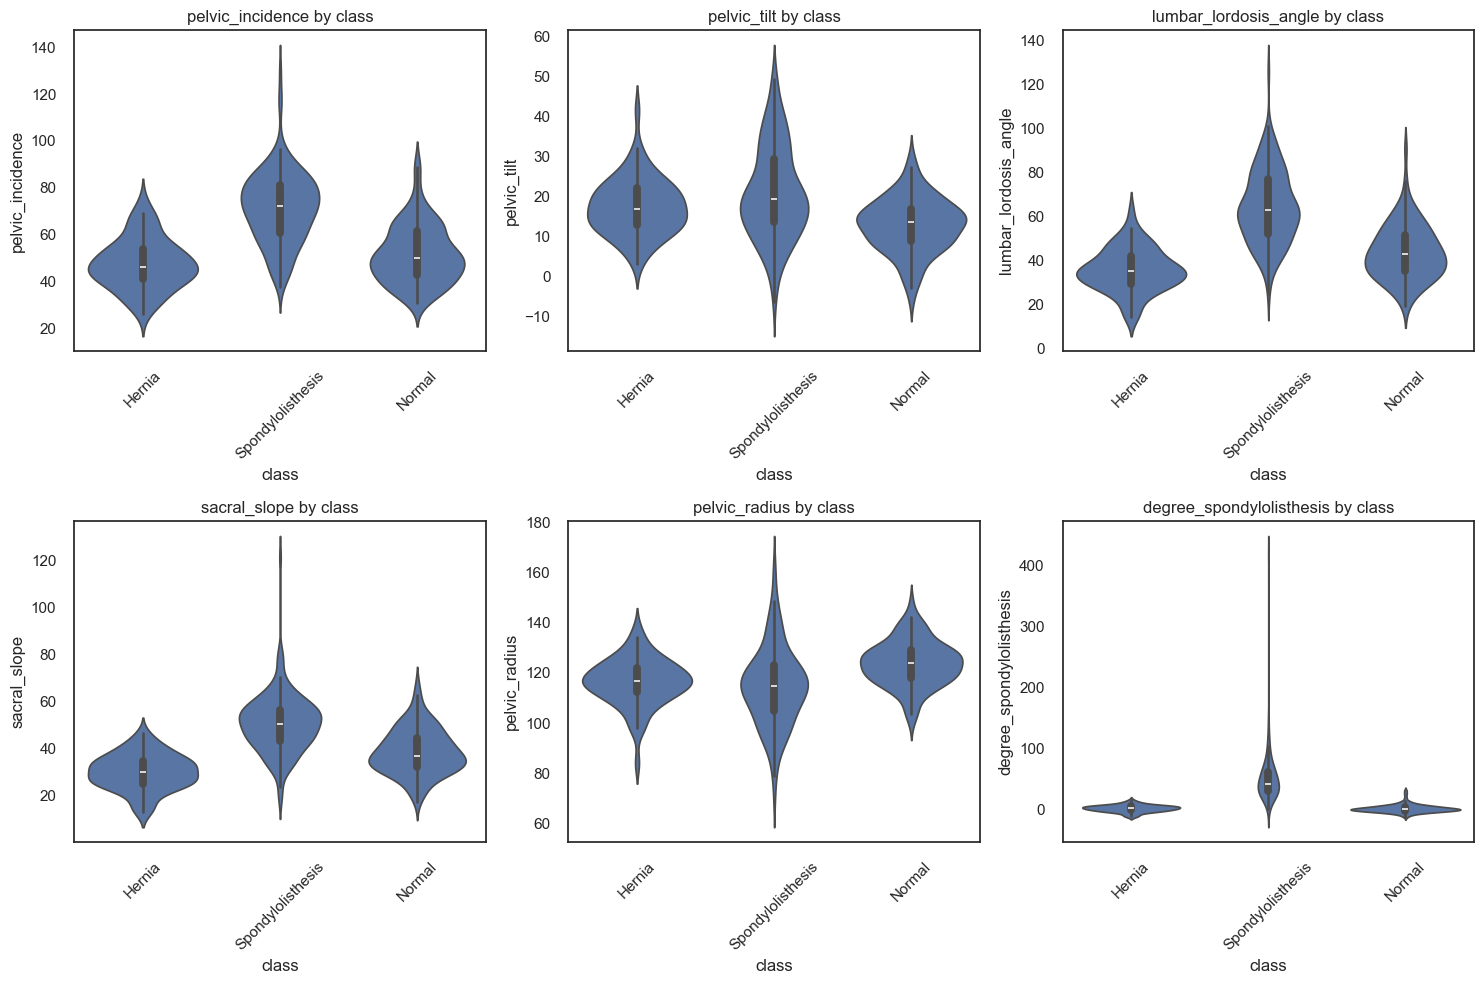


===== EDA for binary_class =====

6. FEATURE RELATIONSHIPS AND INTERACTIONS
Generating pair plot for feature relationships...


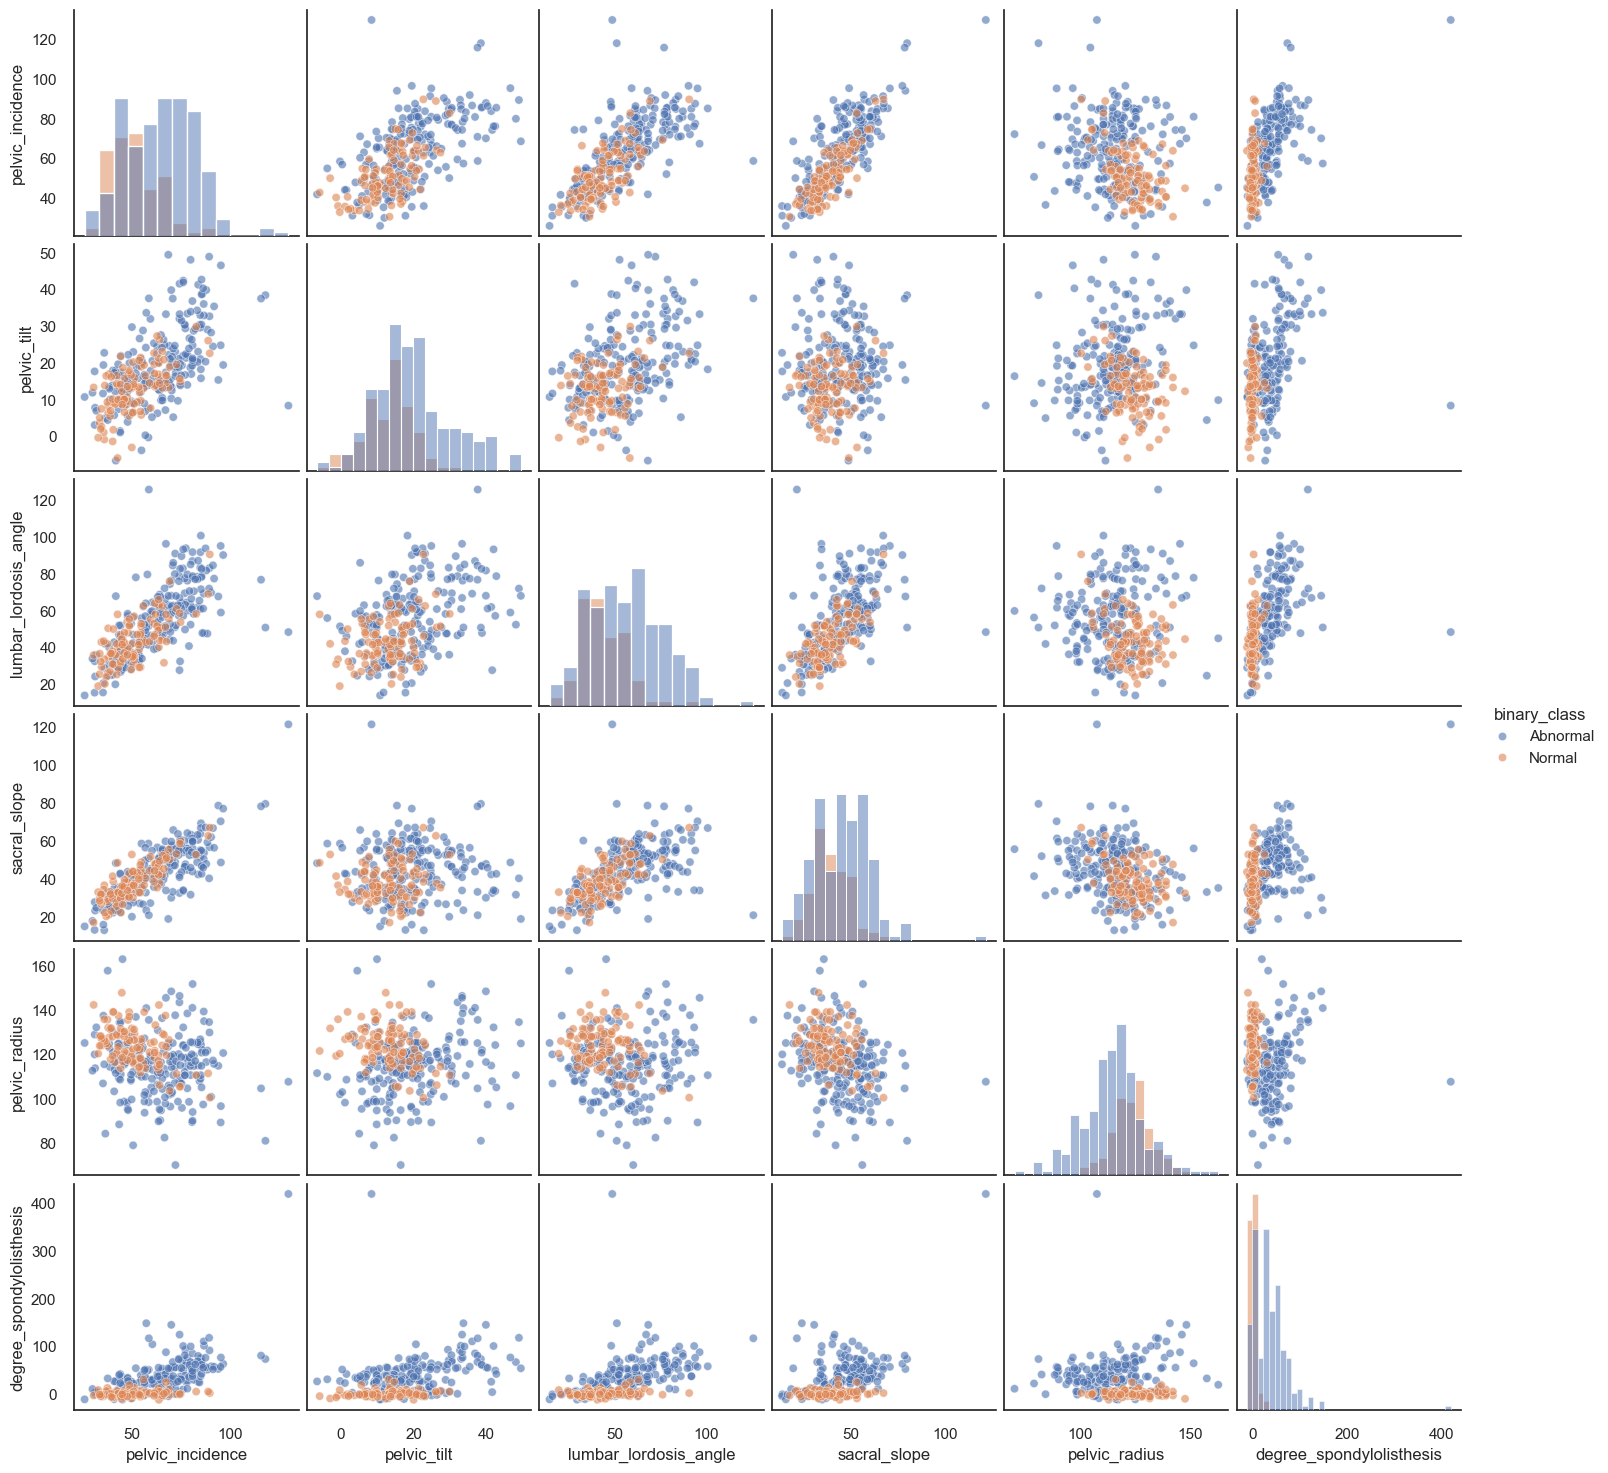


Feature Interactions Analysis:
-----------------------------------
                    Feature  F_Statistic   P_Value  Effect_Size  Significant
0          pelvic_incidence    43.938148  0.000000     0.124846         True
1               pelvic_tilt    36.641311  0.000000     0.106317         True
2     lumbar_lordosis_angle    33.329612  0.000000     0.097646         True
3              sacral_slope    14.294805  0.000188     0.044353         True
4             pelvic_radius    32.712134  0.000000     0.096011         True
5  degree_spondylolisthesis    75.494050  0.000000     0.196858         True


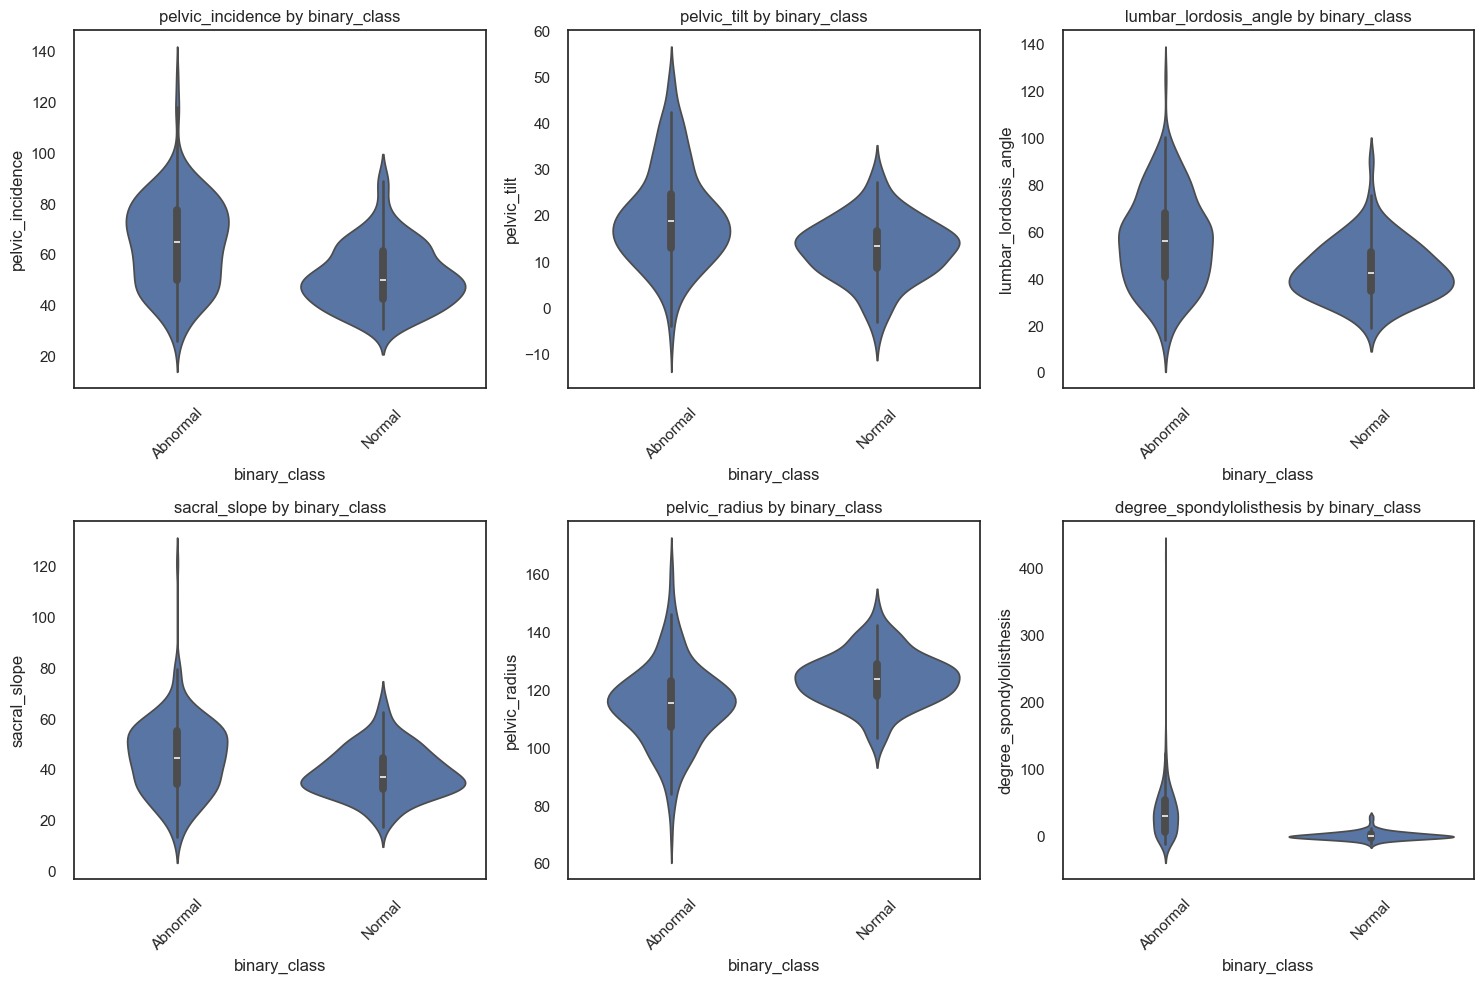

In [87]:
# Cell 8: Feature relationships and interactions

def feature_relationships(df, target_col='class'):
    """
    Analyze relationships between features and target:
    - Pairwise feature relationships
    - Statistical significance testing (ANOVA/Kruskal-Wallis)
    - Effect size calculations
    - Violin plots for significant features
    """
    print("\n" + "="*50)
    print("6. FEATURE RELATIONSHIPS AND INTERACTIONS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print("Generating pair plot for feature relationships...")
    if len(numerical_cols) <= 6:
        g = sns.pairplot(df, hue=target_col, diag_kind='hist', plot_kws={'alpha': 0.6})
        g.savefig(f"{plots_folder}/feature_pairplot_{target_col}.png", bbox_inches="tight")
        plt.show()
    else:
        print("Too many features for pair plot. Showing correlation matrix instead.")
    print("\nFeature Interactions Analysis:")
    print("-" * 35)
    interaction_results = []
    for col in numerical_cols:
        groups = [df[df[target_col] == group][col].dropna() for group in df[target_col].unique()]
        if len(groups) > 1 and all(len(group) > 1 for group in groups):
            f_stat, p_value = stats.f_oneway(*groups)
            effect_size = f_stat / (f_stat + sum(len(group) for group in groups) - len(groups))
            interaction_results.append({
                'Feature': col,
                'F_Statistic': f_stat,
                'P_Value': p_value,
                'Effect_Size': effect_size,
                'Significant': p_value < 0.05
            })
    if interaction_results:
        interaction_df = pd.DataFrame(interaction_results)
        print(interaction_df.round(6))
        significant_features = interaction_df[interaction_df['Significant']]['Feature'].tolist()
        if significant_features:
            n_features = len(significant_features)
            n_cols = min(3, n_features)
            n_rows = (n_features + n_cols - 1) // n_cols
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
            if n_rows == 1:
                axes = [axes] if n_cols == 1 else axes
            else:
                axes = axes.flatten()
            for i, feature in enumerate(significant_features):
                sns.violinplot(data=df, x=target_col, y=feature, ax=axes[i])
                axes[i].set_title(f'{feature} by {target_col}')
                axes[i].tick_params(axis='x', rotation=45)
            for i in range(len(significant_features), len(axes)):
                axes[i].set_visible(False)
            plt.tight_layout()
            plt.savefig(f"{plots_folder}/feature_interactions_violin_{target_col}.png", bbox_inches="tight")
            plt.show()

for tgt in ['class', 'binary_class']:
    print(f"\n===== EDA for {tgt} =====")
    feature_relationships(df, target_col=tgt)



===== EDA for class =====

7. DIMENSIONALITY REDUCTION ANALYSIS
PCA Analysis:
---------------
Explained Variance Ratio: [0.541  0.1991 0.1268 0.0788 0.0543 0.    ]
Cumulative Explained Variance: [0.541  0.7401 0.8669 0.9457 1.     1.    ]
Components needed for 95% variance: 5

Performing t-SNE analysis...


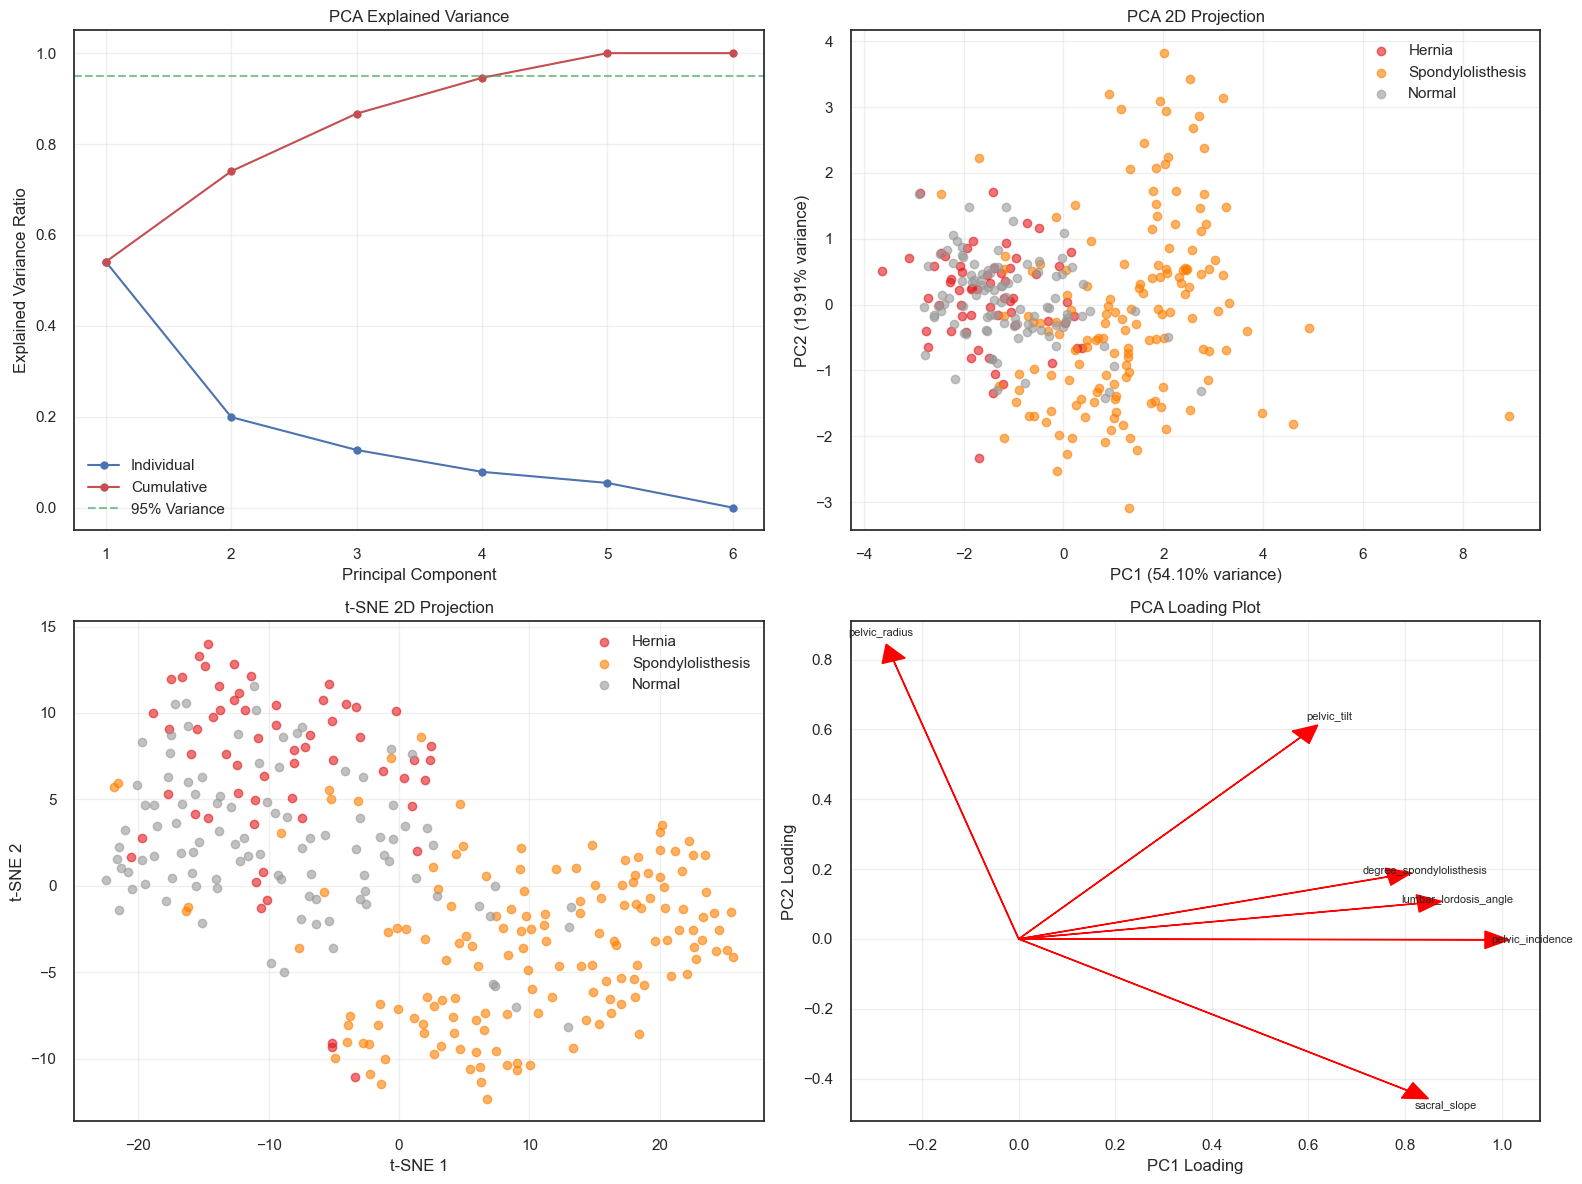


===== EDA for binary_class =====

7. DIMENSIONALITY REDUCTION ANALYSIS
PCA Analysis:
---------------
Explained Variance Ratio: [0.541  0.1991 0.1268 0.0788 0.0543 0.    ]
Cumulative Explained Variance: [0.541  0.7401 0.8669 0.9457 1.     1.    ]
Components needed for 95% variance: 5

Performing t-SNE analysis...


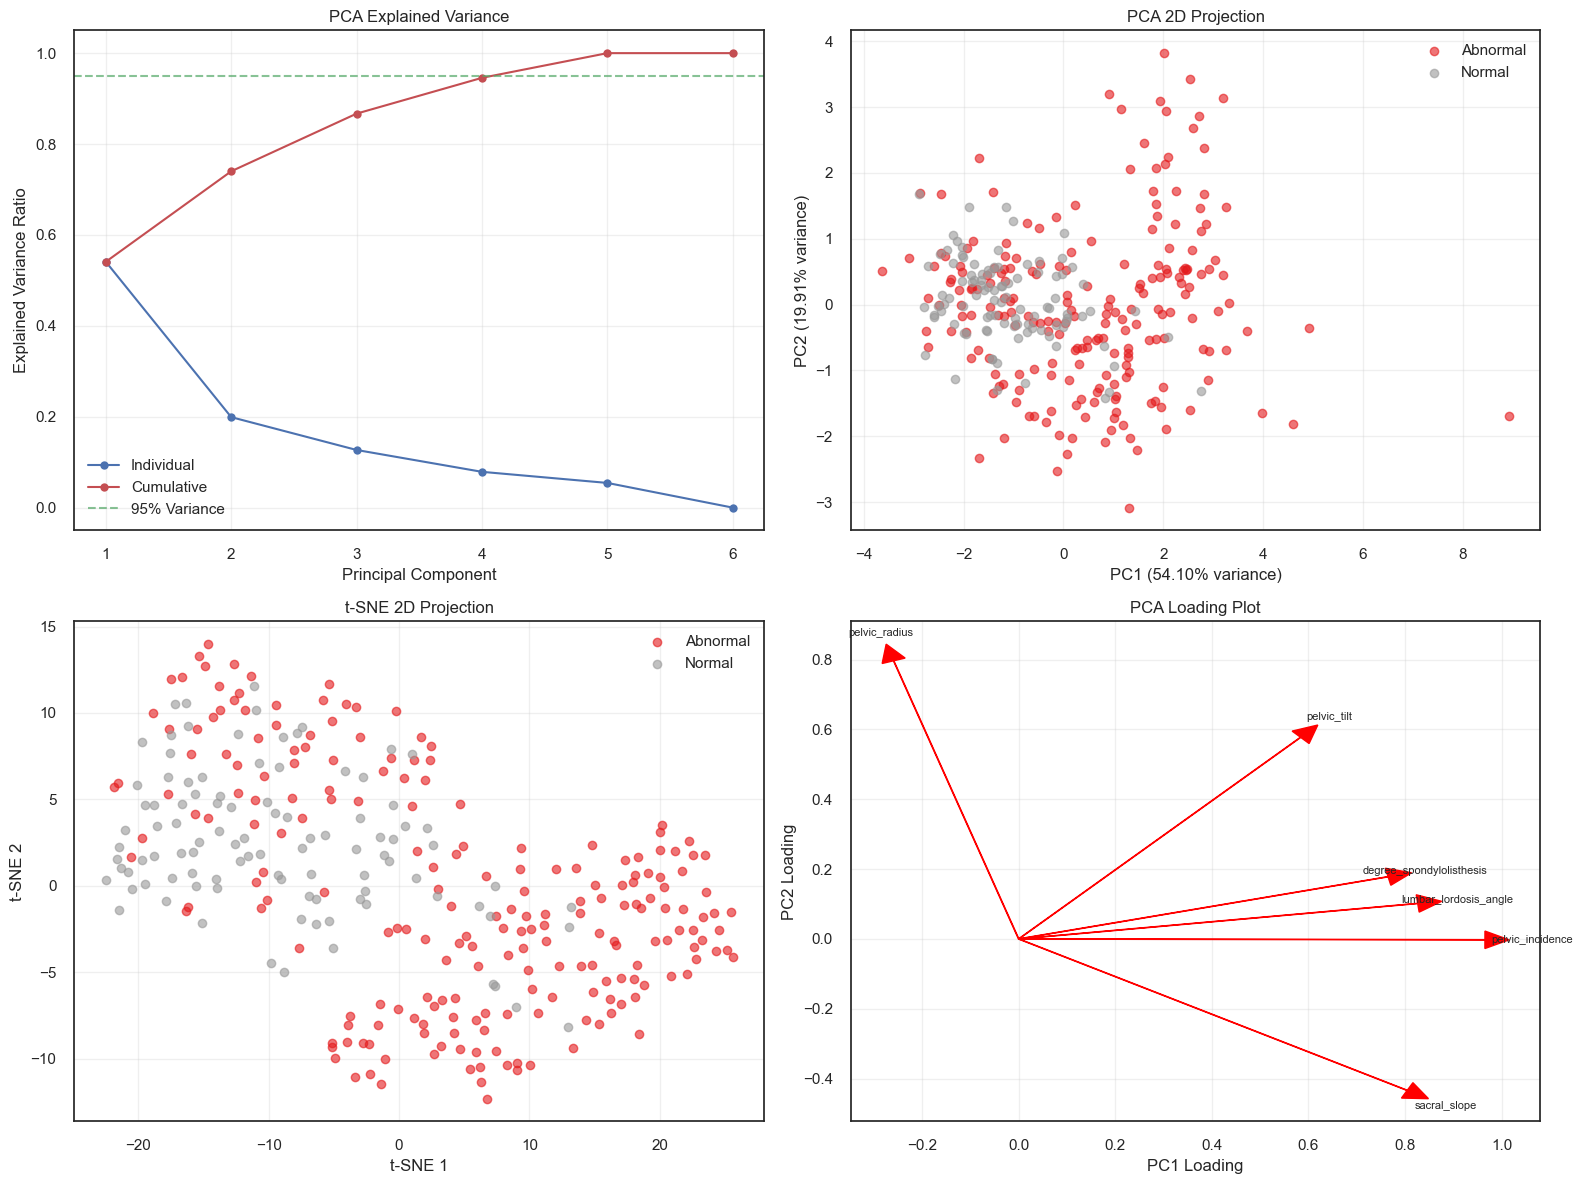

In [88]:
# Cell 9: Dimensionality reduction

def dimensionality_analysis(df, target_col='class'):
    """
    Perform dimensionality reduction analysis:
    - Principal Component Analysis (PCA)
    - t-SNE visualization
    - Explained variance analysis
    - Component loadings interpretation
    """
    print("\n" + "="*50)
    print("7. DIMENSIONALITY REDUCTION ANALYSIS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    X = df[numerical_cols].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    print("PCA Analysis:")
    print("-" * 15)
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_.round(4)}")
    print(f"Cumulative Explained Variance: {pca.explained_variance_ratio_.cumsum().round(4)}")
    cumsum_var = pca.explained_variance_ratio_.cumsum()
    n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
    print(f"Components needed for 95% variance: {n_components_95}")
    print("\nPerforming t-SNE analysis...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(X_scaled)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes[0, 0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', label='Individual')
    axes[0, 0].plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-', label='Cumulative')
    axes[0, 0].axhline(y=0.95, color='g', linestyle='--', alpha=0.7, label='95% Variance')
    axes[0, 0].set_xlabel('Principal Component')
    axes[0, 0].set_ylabel('Explained Variance Ratio')
    axes[0, 0].set_title('PCA Explained Variance')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    colors = plt.cm.Set1(np.linspace(0, 1, len(df[target_col].unique())))
    for i, target_class in enumerate(df[target_col].unique()):
        mask = df[target_col] == target_class
        axes[0, 1].scatter(pca_result[mask, 0], pca_result[mask, 1], c=[colors[i]], label=target_class, alpha=0.6)
    axes[0, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    axes[0, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    axes[0, 1].set_title('PCA 2D Projection')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    for i, target_class in enumerate(df[target_col].unique()):
        mask = df[target_col] == target_class
        axes[1, 0].scatter(tsne_result[mask, 0], tsne_result[mask, 1], c=[colors[i]], label=target_class, alpha=0.6)
    axes[1, 0].set_xlabel('t-SNE 1')
    axes[1, 0].set_ylabel('t-SNE 2')
    axes[1, 0].set_title('t-SNE 2D Projection')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    if len(numerical_cols) <= 10:
        loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])
        loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=numerical_cols)
        for i, feature in enumerate(numerical_cols):
            axes[1, 1].arrow(0, 0, loading_df.loc[feature, 'PC1'], loading_df.loc[feature, 'PC2'],
                           head_width=0.05, head_length=0.05, fc='red', ec='red')
            axes[1, 1].text(loading_df.loc[feature, 'PC1'] * 1.1, loading_df.loc[feature, 'PC2'] * 1.1,
                          feature, fontsize=8, ha='center', va='center')
        axes[1, 1].set_xlabel('PC1 Loading')
        axes[1, 1].set_ylabel('PC2 Loading')
        axes[1, 1].set_title('PCA Loading Plot')
        axes[1, 1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/dimensionality_reduction_{target_col}.png", bbox_inches="tight")
    plt.show()

for tgt in ['class', 'binary_class']:
    print(f"\n===== EDA for {tgt} =====")
    dimensionality_analysis(df, target_col=tgt)




===== EDA for class =====

8. CLUSTERING ANALYSIS
Optimal number of clusters (silhouette): 2
Best silhouette score: 0.363


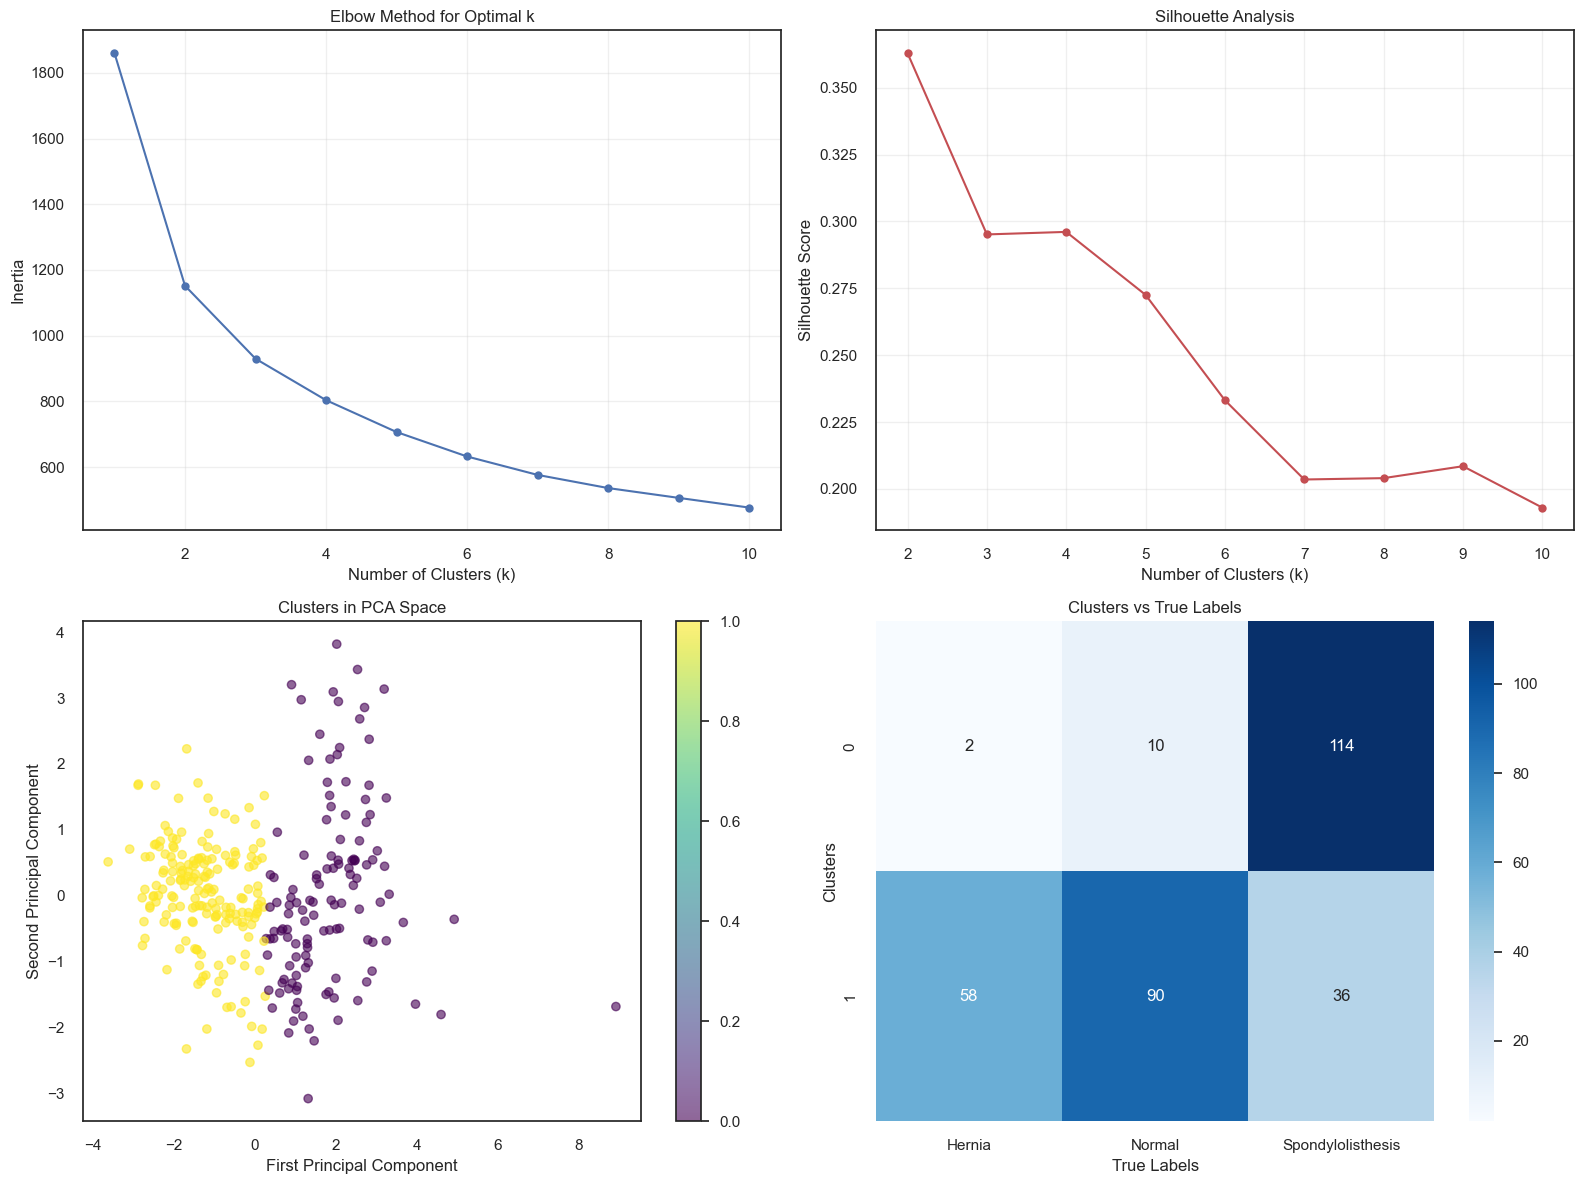


Cluster vs True Labels Cross-tabulation:
class    Hernia  Normal  Spondylolisthesis
Cluster                                   
0             2      10                114
1            58      90                 36

===== EDA for binary_class =====

8. CLUSTERING ANALYSIS
Optimal number of clusters (silhouette): 2
Best silhouette score: 0.363


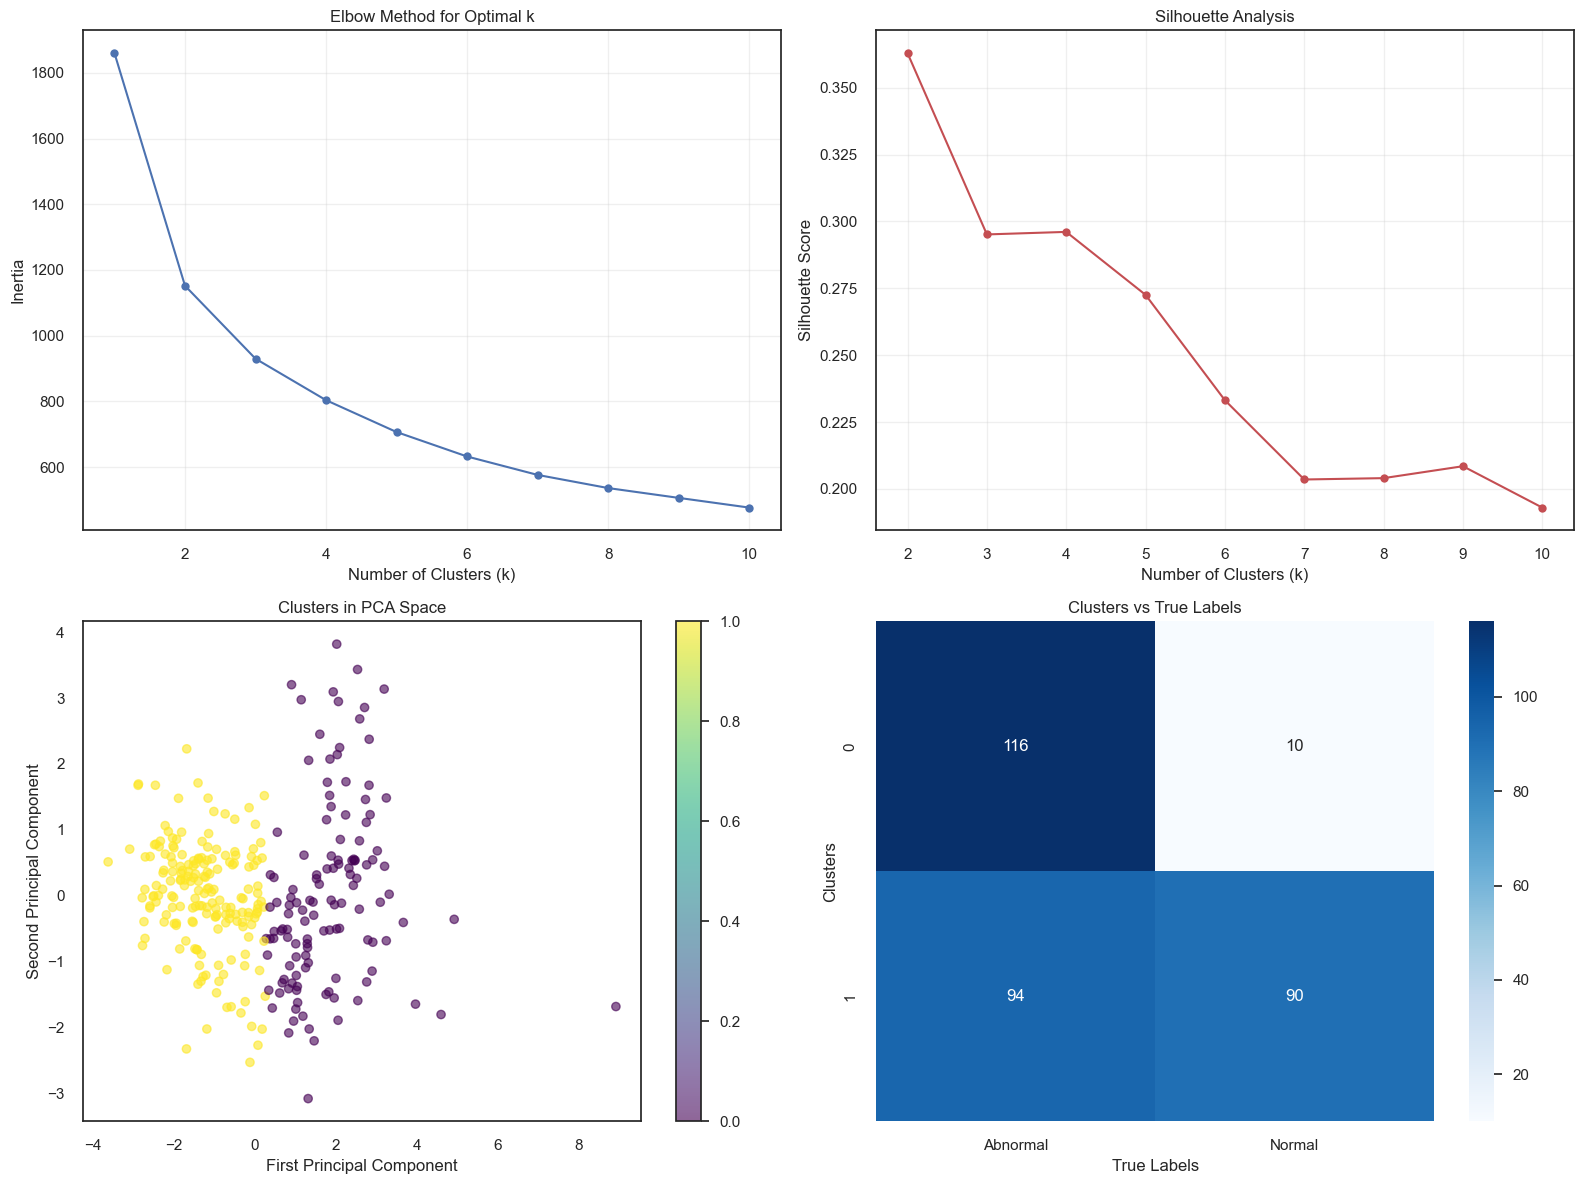


Cluster vs True Labels Cross-tabulation:
binary_class  Abnormal  Normal
Cluster                       
0                  116      10
1                   94      90


In [89]:
# Cell 10: Clustering analysis

def clustering_analysis(df, target_col='class'):
    """
    Perform clustering analysis:
    - K-means clustering with optimal k selection
    - Elbow method for k selection
    - Silhouette analysis
    - Comparison with true labels
    """
    print("\n" + "="*50)
    print("8. CLUSTERING ANALYSIS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    X = df[numerical_cols].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    inertias = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    from sklearn.metrics import silhouette_score
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters (silhouette): {optimal_k}")
    print(f"Best silhouette score: {max(silhouette_scores):.3f}")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    df_cluster = df.copy()
    df_cluster['Cluster'] = cluster_labels
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes[0, 0].plot(k_range, inertias, 'bo-')
    axes[0, 0].set_xlabel('Number of Clusters (k)')
    axes[0, 0].set_ylabel('Inertia')
    axes[0, 0].set_title('Elbow Method for Optimal k')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 1].plot(range(2, 11), silhouette_scores, 'ro-')
    axes[0, 1].set_xlabel('Number of Clusters (k)')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].set_title('Silhouette Analysis')
    axes[0, 1].grid(True, alpha=0.3)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    scatter = axes[1, 0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    axes[1, 0].set_xlabel('First Principal Component')
    axes[1, 0].set_ylabel('Second Principal Component')
    axes[1, 0].set_title('Clusters in PCA Space')
    plt.colorbar(scatter, ax=axes[1, 0])
    cluster_crosstab = pd.crosstab(df_cluster['Cluster'], df_cluster[target_col])
    sns.heatmap(cluster_crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
    axes[1, 1].set_title('Clusters vs True Labels')
    axes[1, 1].set_xlabel('True Labels')
    axes[1, 1].set_ylabel('Clusters')
    plt.tight_layout()
    plt.savefig(f"{plots_folder}/clustering_analysis_{target_col}.png", bbox_inches="tight")
    plt.show()
    print("\nCluster vs True Labels Cross-tabulation:")
    print(cluster_crosstab)


for tgt in ['class', 'binary_class']:
    print(f"\n===== EDA for {tgt} =====")
    clustering_analysis(df, target_col=tgt)

# Statistical tests


===== EDA for class =====

9. STATISTICAL TESTS

Feature: pelvic_incidence
--------------------
  Hernia: Shapiro p=0.4391 (Normal)
  Normal: Shapiro p=0.0026 (Non-normal)
  Spondylolisthesis: Shapiro p=0.0034 (Non-normal)
  Levene’s p=0.0210 (Unequal variances)
  Kruskal-Wallis H=127.496, p=2.0636e-28

Feature: pelvic_tilt
--------------------
  Hernia: Shapiro p=0.2371 (Normal)
  Normal: Shapiro p=0.7920 (Normal)
  Spondylolisthesis: Shapiro p=0.0287 (Non-normal)
  Levene’s p=0.0000 (Unequal variances)
  Kruskal-Wallis H=34.395, p=3.3976e-08

Feature: lumbar_lordosis_angle
--------------------
  Hernia: Shapiro p=0.6849 (Normal)
  Normal: Shapiro p=0.0165 (Non-normal)
  Spondylolisthesis: Shapiro p=0.0709 (Normal)
  Levene’s p=0.0001 (Unequal variances)
  Kruskal-Wallis H=145.891, p=2.0898e-32

Feature: sacral_slope
--------------------
  Hernia: Shapiro p=0.8043 (Normal)
  Normal: Shapiro p=0.2554 (Normal)
  Spondylolisthesis: Shapiro p=0.0000 (Non-normal)
  Levene’s p=0.0252 (Uneq

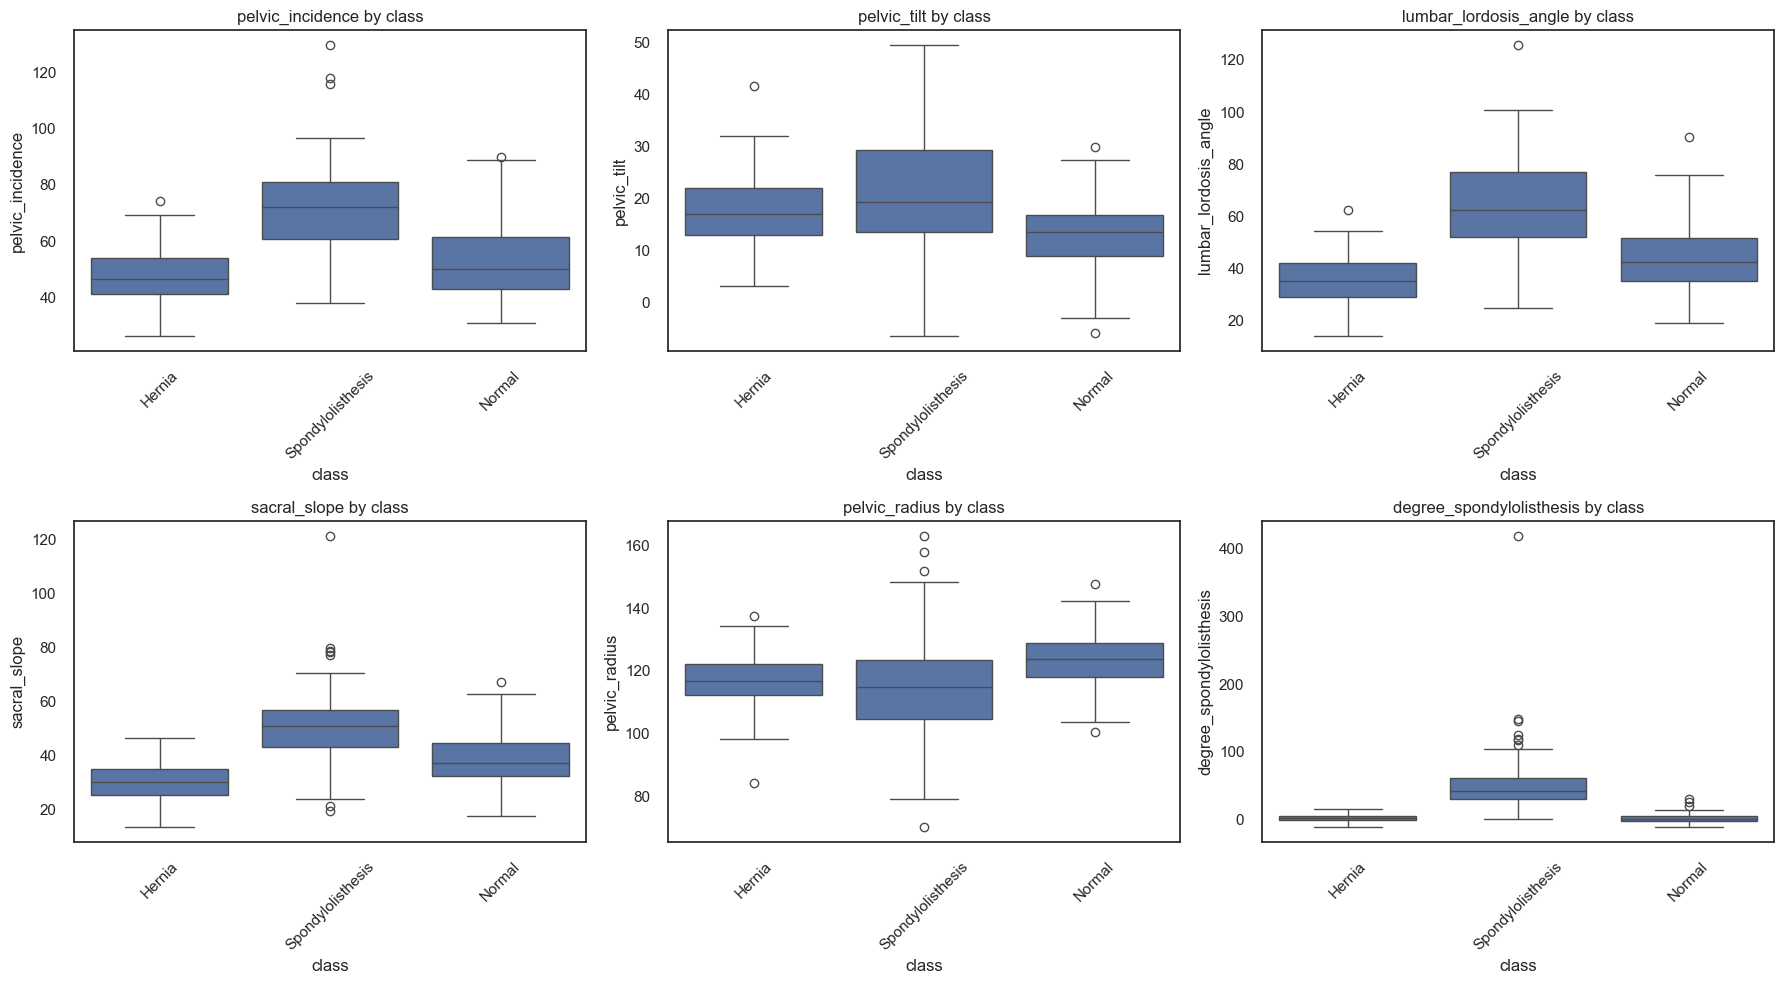


===== EDA for binary_class =====

9. STATISTICAL TESTS

Feature: pelvic_incidence
--------------------
  Abnormal: Shapiro p=0.0035 (Non-normal)
  Normal: Shapiro p=0.0026 (Non-normal)
  Levene’s p=0.0000 (Unequal variances)
  Kruskal-Wallis H=40.243, p=2.2423e-10

Feature: pelvic_tilt
--------------------
  Abnormal: Shapiro p=0.0005 (Non-normal)
  Normal: Shapiro p=0.7920 (Normal)
  Levene’s p=0.0001 (Unequal variances)
  Kruskal-Wallis H=32.104, p=1.4616e-08

Feature: lumbar_lordosis_angle
--------------------
  Abnormal: Shapiro p=0.0389 (Non-normal)
  Normal: Shapiro p=0.0165 (Non-normal)
  Levene’s p=0.0000 (Unequal variances)
  Kruskal-Wallis H=30.601, p=3.1688e-08

Feature: sacral_slope
--------------------
  Abnormal: Shapiro p=0.0000 (Non-normal)
  Normal: Shapiro p=0.2554 (Normal)
  Levene’s p=0.0001 (Unequal variances)
  Kruskal-Wallis H=14.888, p=1.1411e-04

Feature: pelvic_radius
--------------------
  Abnormal: Shapiro p=0.0280 (Non-normal)
  Normal: Shapiro p=0.9361 (N

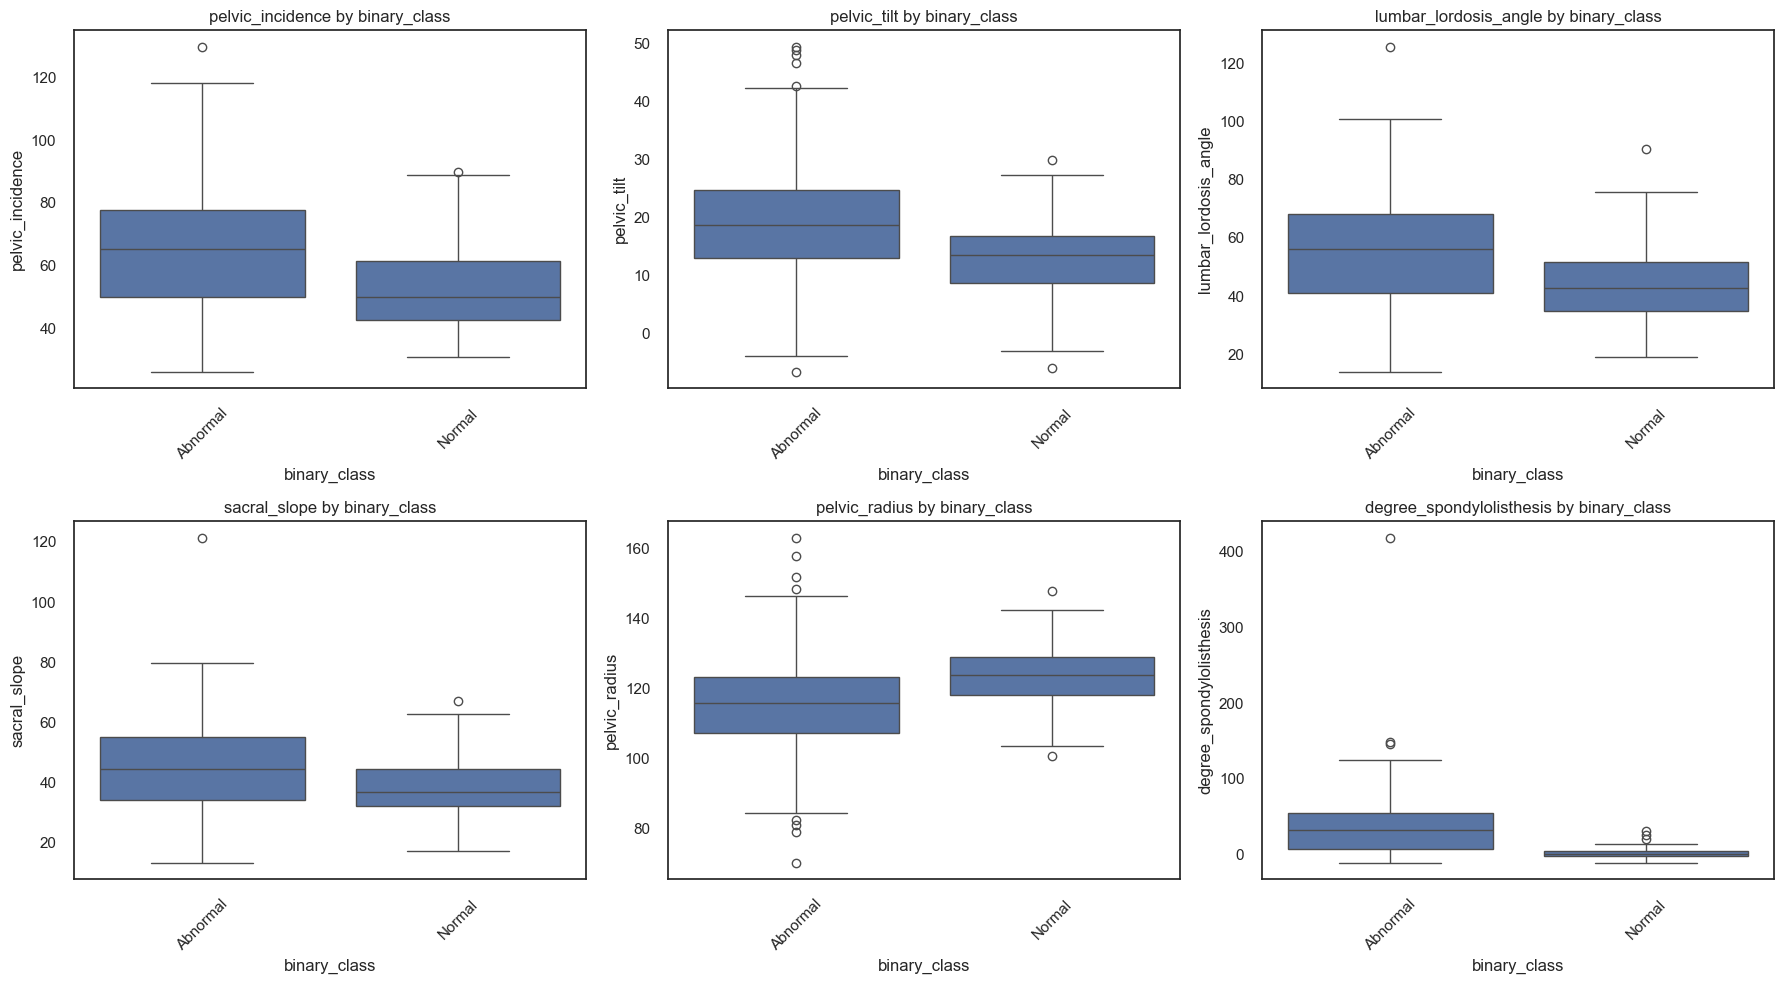

In [90]:
def statistical_tests(df, target_col='class'):
    print("\n" + "="*50)
    print("9. STATISTICAL TESTS")
    print("="*50)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    groups = df.groupby(target_col)
    group_names = list(groups.groups.keys())
    group_data = [df[df[target_col] == name][numerical_cols] for name in group_names]
    stats_results = []
    for col in numerical_cols:
        print(f"\nFeature: {col}")
        print("-" * 20)
        feat_group_data = [df[df[target_col] == name][col].dropna() for name in group_names]
        normality = []
        for i, data in enumerate(feat_group_data):
            if len(data) > 3:
                _, pval = stats.shapiro(data)
                normality.append(pval > 0.05)
                print(f"  {group_names[i]}: Shapiro p={pval:.4f} ({'Normal' if pval>0.05 else 'Non-normal'})")
            else:
                normality.append(False)
                print(f"  {group_names[i]}: Not enough data for normality test")
        if all([len(x)>3 for x in feat_group_data]):
            _, p_levene = levene(*feat_group_data)
            print(f"  Levene’s p={p_levene:.4f} ({'Equal variances' if p_levene>0.05 else 'Unequal variances'})")
        else:
            p_levene = np.nan
        if all(normality) and (p_levene > 0.05):
            f_stat, p_anova = stats.f_oneway(*feat_group_data)
            print(f"  ANOVA F={f_stat:.3f}, p={p_anova:.4e}")
            test_type = "ANOVA"
            test_stat = f_stat
            p_val = p_anova
        else:
            h_stat, p_kruskal = stats.kruskal(*feat_group_data)
            print(f"  Kruskal-Wallis H={h_stat:.3f}, p={p_kruskal:.4e}")
            test_type = "Kruskal-Wallis"
            test_stat = h_stat
            p_val = p_kruskal
        stats_results.append({
            'Feature': col,
            'Test': test_type,
            'Test Statistic': test_stat,
            'p-value': p_val,
            'Significant': p_val < 0.05
        })
    results_df = pd.DataFrame(stats_results)
    print("\nSummary Table:")
    print(results_df.round(5))
    significant = results_df[results_df['Significant']]
    if not significant.empty:
        print("\nFeatures with significant class differences (p < 0.05):")
        print(significant[['Feature', 'Test', 'p-value']])
    else:
        print("\nNo statistically significant feature differences found at p < 0.05.")

    # --- ALL BOXPLOTS IN ONE FIGURE (SUBPLOTS) ---
    if not significant.empty:
        sig_features = significant['Feature'].tolist()
        n_features = len(sig_features)
        n_cols = min(3, n_features)
        n_rows = (n_features + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1 or n_cols == 1:
            axes = axes.flatten()
        else:
            axes = axes.flatten()

        for i, col in enumerate(sig_features):
            sns.boxplot(data=df, x=target_col, y=col, ax=axes[i])
            axes[i].set_title(f'{col} by {target_col}')
            axes[i].tick_params(axis='x', rotation=45)

        # Hide unused axes
        for i in range(len(sig_features), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.savefig(f"{plots_folder}/statistical_tests_boxplots_{target_col}.png", bbox_inches="tight")
        plt.show()

# Example usage (for both targets):
for tgt in ['class', 'binary_class']:
    print(f"\n===== EDA for {tgt} =====")
    statistical_tests(df, target_col=tgt)


In [91]:
# Feature engineering
# Create the pi_ss_ratio feature
df['pi_ss_ratio'] = df['pelvic_incidence'] / df['sacral_slope']

# Drop pelvic_incidence to avoid redundancy
df = df.drop(columns=['pelvic_incidence'])

# Save the modified DataFrame to a new CSV file in the current directory
ordered_cols = [
    'pelvic_tilt',
    'sacral_slope',
    'lumbar_lordosis_angle',
    'pelvic_radius',
    'degree_spondylolisthesis',
    'pi_ss_ratio',
    'class',           # multi-class target
    'binary_class'     # binary target
]
df = df[ordered_cols]

# Save clean version

df.to_csv('column_3C_processed.csv', index=False)

df.head()


pelvic_tilt  sacral_slope  lumbar_lordosis_angle  pelvic_radius  \
0    22.552586     40.475232              39.609117      98.672917   
1    10.060991     28.995960              25.015378     114.405425   
2    22.218482     46.613539              50.092194     105.985135   
3    24.652878     44.644130              44.311238     101.868495   
4     9.652075     40.060784              28.317406     108.168725   

   degree_spondylolisthesis  pi_ss_ratio   class binary_class  
0                 -0.254400     1.557195  Hernia     Abnormal  
1                  4.564259     1.346979  Hernia     Abnormal  
2                 -3.530317     1.476653  Hernia     Abnormal  
3                 11.211523     1.552209  Hernia     Abnormal  
4                  7.918501     1.240936  Hernia     Abnormal

In [103]:
from sklearn.preprocessing import PowerTransformer
df["degree_spondylolisthesis"].min() # but in order to deal with the issue of the negaive values I will just do the PowerTransformation on the whole column
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['degree_spondylolisthesis_PowerTransformer'] = pt.fit_transform(df[['degree_spondylolisthesis']])
#this needs to be l

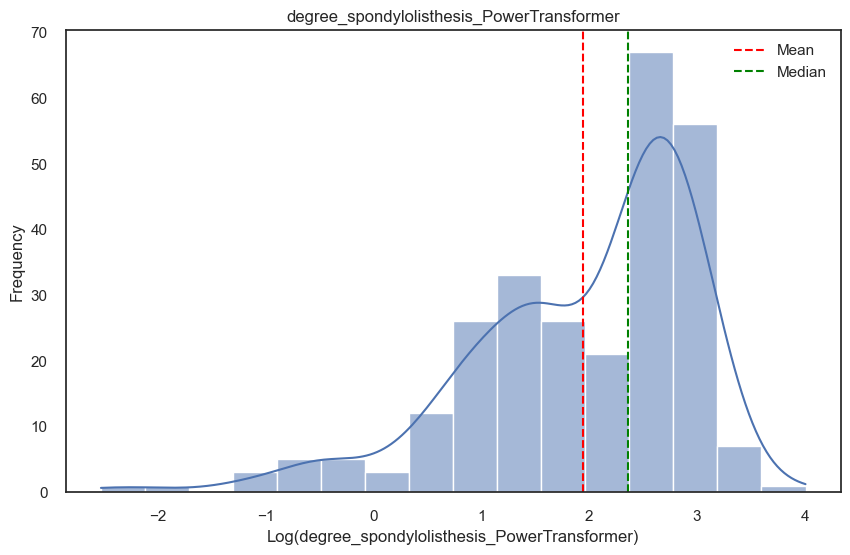

In [106]:
# apply log transformation to degree_spondylolisthesis and plot a histogram
def log_transform_and_plot(df, column):
    """
    Apply log transformation to a specified column and plot its histogram.
    """
    df[column + '_log'] = np.log1p(df[column])
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column + '_log'], kde=True)
    plt.title(f'{column}')
    plt.xlabel(f'Log({column})')
    plt.ylabel('Frequency')
    plt.axvline(df[column + '_log'].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[column + '_log'].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.savefig(f"{plots_folder}/{column}.png", bbox_inches="tight")
    plt.show()
log_transform_and_plot(df, 'degree_spondylolisthesis_PowerTransformer')



In [108]:
len(df)

310

In [109]:
df.head()

pelvic_tilt  sacral_slope  lumbar_lordosis_angle  pelvic_radius  \
0    22.552586     40.475232              39.609117      98.672917   
1    10.060991     28.995960              25.015378     114.405425   
2    22.218482     46.613539              50.092194     105.985135   
3    24.652878     44.644130              44.311238     101.868495   
4     9.652075     40.060784              28.317406     108.168725   

   degree_spondylolisthesis  pi_ss_ratio   class binary_class  \
0                 -0.254400     1.557195  Hernia     Abnormal   
1                  4.564259     1.346979  Hernia     Abnormal   
2                 -3.530317     1.476653  Hernia     Abnormal   
3                 11.211523     1.552209  Hernia     Abnormal   
4                  7.918501     1.240936  Hernia     Abnormal   

   degree_spondylolisthesis_log  degree_spondylolisthesis_trans  \
0                     -0.293566                       -0.267585   
1                      1.716364                        2.922868   
2                           NaN                       -5.347396   
3                      2.502380                        5.581202   
4                      2.188128                        4.373008   

   degree_spondylolisthesis_trans_log  \
0                           -0.311408   
1                            1.366823   
2                                 NaN   
3                            1.884217   
4                            1.681388   

   degree_spondylolisthesis_PowerTransformer  \
0                                  -0.267585   
1                                   2.922868   
2                                  -5.347396   
3                                   5.581202   
4                                   4.373008   

   degree_spondylolisthesis_PowerTransformer_log  
0                                      -0.311408  
1                                       1.366823  
2                                            NaN  
3                                       1.884217  
4                                       1.681388